---
Name : Rameesha

---
Department : MSDS

---
Roll No : 25F-8011

---

[Click to view streamlit Live](https://huggingface.co/spaces/rameesha146/urdu-roman-transliteration-rameesha)

---

[Click to view github Repository](https://github.com/Rameesha-Malik/urdu-to-roman-urdu-nmt-rameesha)

---

[Click to view medium blog ](https://medium.com/@rameeshamalik.143/building-an-ai-translator-converting-urdu-text-to-roman-urdu-3b4bab74c159)


---
[Click to view linkedIn Post](https://lnkd.in/p/dfq4ZHQW)

---




# Section 1: System Environment Check and Setup

 **Purpose:**

 Verify the system environment, check Python version, GPU availability,
and PyTorch installation before starting the main project work.
Run this section first to ensure everything is properly configured.

In [ ]:
print("Starting system environment verification...")
print("-" * 60)

# Check Python version information
import sys, os
print("Python Version:", sys.version.splitlines()[0])

# Check GPU availability using nvidia-smi command
# This will show GPU information if NVIDIA drivers are installed
print("\n-- GPU Information Check --")
print("Running nvidia-smi to check for available GPUs...")
os.system("nvidia-smi || true")  # '|| true' prevents error if nvidia-smi not found

# Verify PyTorch installation and CUDA support
print("\n-- PyTorch and CUDA Verification --")
try:
    import torch
    print("PyTorch Version:", torch.__version__)
    print("CUDA Available:", torch.cuda.is_available())

    # If CUDA is available, get detailed GPU information
    if torch.cuda.is_available():
        try:
            print("Primary CUDA Device Name:", torch.cuda.get_device_name(0))
            print("Total CUDA Devices:", torch.cuda.device_count())
            print("Current CUDA Device Index:", torch.cuda.current_device())
        except Exception as e:
            print("Warning: Couldn't query detailed GPU information:", e)
    else:
        print("Note: CUDA not available - will use CPU for computations")

except ImportError as e:
    print("Error: PyTorch not installed or import failed:", e)
    print("Please install PyTorch before proceeding")
except Exception as e:
    print("Unexpected error during PyTorch verification:", e)

print("\n" + "-" * 60)
print("System environment check completed!")
print("If no errors appeared above, you're ready to proceed to the next section.")

Starting system environment verification...
------------------------------------------------------------
Python Version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]

-- GPU Information Check --
Running nvidia-smi to check for available GPUs...

-- PyTorch and CUDA Verification --
PyTorch Version: 2.8.0+cu126
CUDA Available: False
Note: CUDA not available - will use CPU for computations

------------------------------------------------------------
System environment check completed!
If no errors appeared above, you're ready to proceed to the next section.


# Section 2: Package Installation and Dependencies

 **Purpose:**

Install all required Python packages for the Neural Machine Translation project.
This includes NLP libraries, evaluation metrics, visualization tools, and web deployment.
Estimated time: 1-3 minutes depending on internet connection.

In [ ]:
print("Installing required packages for NMT project...")
print("This may take 1-3 minutes depending on your internet connection")
print("-" * 60)

# First, upgrade pip to latest version to avoid compatibility issues
print("Step 1: Upgrading pip to latest version...")
!pip install -q --upgrade pip

# Install all required packages with quiet flag (-q) to keep output clean
print("Step 2: Installing project dependencies...")
print("Installing: tokenization, evaluation, ML, and visualization libraries...")

!pip install -q sentencepiece tokenizers transformers sacrebleu editdistance python-Levenshtein pandas numpy tqdm scikit-learn streamlit matplotlib

# Package breakdown explanation:
# sentencepiece, tokenizers: For text tokenization (BPE, WordPiece)
# transformers: HuggingFace library (may be used for comparison or utilities)
# sacrebleu: Standard BLEU score evaluation for machine translation
# editdistance, python-Levenshtein: For calculating character error rate and edit distance
# pandas, numpy: Data manipulation and numerical computations
# tqdm: Progress bars for long-running processes
# scikit-learn: Machine learning utilities and metrics
# streamlit: Web app framework for model deployment
# matplotlib: Plotting and visualization

print("Step 3: All packages installed successfully!")

# Optional: Fresh PyTorch installation
# Uncomment the lines below if you need the latest PyTorch version
# Note: Google Colab usually comes with a compatible PyTorch version pre-installed
# This reinstallation may take additional time and is typically not necessary

print("\nOptional: PyTorch reinstallation (currently commented out)")
print("Colab typically has compatible PyTorch pre-installed")
print("Uncomment the line below only if you encounter PyTorch version issues:")
print("# !pip install -q torch torchvision torchaudio")

# Uncomment this line only if you need the latest PyTorch:
# !pip install -q torch torchvision torchaudio

print("\n" + "-" * 60)
print("Package installation completed!")
print("now proceed to import libraries and start the main project.")

Installing required packages for NMT project...
This may take 1-3 minutes depending on your internet connection
------------------------------------------------------------
Step 1: Upgrading pip to latest version...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
Step 2: Installing project dependencies...
Installing: tokenization, evaluation, ML, and visualization libraries...
Step 3: All packages installed successfully!

Optional: PyTorch reinstallation (currently commented out)
Colab typically has compatible PyTorch pre-installed
Uncomment the line below only if you encounter PyTorch version issues:
# !pip install -q torch torchvision torchaudio

------------------------------------------------------------
Package installation completed!
now proceed to import libraries and start the main project.


# Section 3: Library Import Verification and Version Check

**Purpose:**

Verify that all required libraries were installed correctly and can be imported.
This section uses safe imports with error handling to identify any missing dependencies
before proceeding with the main project code.


In [ ]:

print("Verifying library imports and versions...")
print("-" * 60)

# Display Python version for reference
import sys
print("Python Version:", sys.version.splitlines()[0])

# Initialize list to track any failed imports
failed_imports = []

# Test PyTorch import and CUDA availability
print("\n-- Core Deep Learning Framework --")
try:
    import torch
    print("PyTorch Version:", torch.__version__)
    print("CUDA Available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("CUDA Device:", torch.cuda.get_device_name(0))
except Exception as e:
    failed_imports.append(("torch", str(e)))
    print("PyTorch import failed:", e)

# Test tokenization libraries (for custom BPE implementation)
print("\n-- Tokenization Libraries --")
try:
    import sentencepiece as smp
    # sentencepiece version might not always be available via __version__
    spm_version = getattr(smp, "__version__", "version unknown")
    print("SentencePiece Version:", smp_version)
except Exception as e:
    failed_imports.append(("sentencepiece", str(e)))
    print("SentencePiece import failed:", e)

try:
    import tokenizers
    print("HuggingFace Tokenizers Version:", tokenizers.__version__)
except Exception as e:
    failed_imports.append(("tokenizers", str(e)))
    print("Tokenizers import failed:", e)

# Test evaluation libraries (for BLEU scores and metrics)
print("\n-- Evaluation Metrics Libraries --")
try:
    import sacrebleu
    print("SacreBLEU Version:", sacrebleu.__version__)
except Exception as e:
    failed_imports.append(("sacrebleu", str(e)))
    print("SacreBLEU import failed:", e)

# Test edit distance libraries (for Character Error Rate calculation)
print("\n-- Edit Distance Libraries --")
try:
    import editdistance
    # editdistance library doesn't consistently expose __version__
    print("EditDistance Library: Successfully imported")
except Exception as e:
    failed_imports.append(("editdistance", str(e)))
    print("EditDistance import failed:", e)

try:
    import Levenshtein
    print("Python-Levenshtein Library: Successfully imported")
except Exception as e:
    # This is marked as non-fatal since editdistance can be used as fallback
    print("Python-Levenshtein import failed (this is optional - editdistance will be used as fallback)")

# Test data manipulation and scientific computing libraries
print("\n-- Data Science Libraries --")
try:
    import pandas as pd
    import numpy as np
    print("Pandas Version:", pd.__version__)
    print("NumPy Version:", np.__version__)
except Exception as e:
    failed_imports.append(("pandas/numpy", str(e)))
    print("Pandas/NumPy import failed:", e)

# Test additional utility libraries
print("\n-- Additional Utilities --")
try:
    import matplotlib.pyplot as plt
    import matplotlib
    print("Matplotlib Version:", matplotlib.__version__)
except Exception as e:
    print("Matplotlib import failed (non-critical):", e)

try:
    import tqdm
    print("TQDM (Progress Bars): Successfully imported")
except Exception as e:
    print("TQDM import failed (non-critical):", e)

# Summary of import verification
print("\n" + "-" * 60)
print("IMPORT VERIFICATION SUMMARY")
print("-" * 60)

if failed_imports:
    print("CRITICAL: Some core imports failed:")
    for package_name, error_message in failed_imports:
        print(f"  !! {package_name}: {error_message}")
    print("\nPlease re-run the package installation section to fix these issues.")
else:
    print("All core packages imported successfully!")
    print("System is ready for Neural Machine Translation project.")

print("\nNote: Some optional libraries may show warnings but won't prevent the project from running.")

Verifying library imports and versions...
------------------------------------------------------------
Python Version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]

-- Core Deep Learning Framework --
PyTorch Version: 2.8.0+cu126
CUDA Available: False

-- Tokenization Libraries --
SentencePiece import failed: name 'smp_version' is not defined
HuggingFace Tokenizers Version: 0.22.0

-- Evaluation Metrics Libraries --
SacreBLEU Version: 2.5.1

-- Edit Distance Libraries --
EditDistance Library: Successfully imported
Python-Levenshtein Library: Successfully imported

-- Data Science Libraries --
Pandas Version: 2.2.2
NumPy Version: 2.0.2

-- Additional Utilities --
Matplotlib Version: 3.10.0
TQDM (Progress Bars): Successfully imported

------------------------------------------------------------
IMPORT VERIFICATION SUMMARY
------------------------------------------------------------
CRITICAL: Some core imports failed:
  !! sentencepiece: name 'smp_version' is not defined

Please re-r

# Section 4: Google Drive Integration & Project Setup

**Purpose:**

 Mount Google Drive for persistent storage and create project directory.
Time: ~10-30 seconds (requires user authentication on first run).

In [ ]:
# Step 1: Mount Google Drive to access persistent storage
# This allows us to save models, data, and results that persist between Colab sessions
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Create dedicated project directory structure
# Organizes all project files in a logical hierarchy within your Drive
# ANLP = Advanced Natural Language Processing course
# A1 = Assignment 1 (Neural Machine Translation project)
!mkdir -p /content/drive/MyDrive/ANLP/A1

# Step 3: Verify setup completion
print("Project folder created at /content/drive/MyDrive/ANLP/A1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project folder created at /content/drive/MyDrive/ANLP/A1


# Section 5: Core Library Imports & Final Verification

**Purpose:**

Import essential libraries for the project and verify versions.
This is a consolidated check after all installations are complete.

In [ ]:
# Step 1: Import all core libraries needed for the project
import sys, torch, sentencepiece as smp, sacrebleu, pandas as pd

# Step 2: Display Python environment information
print("Python:", sys.version.splitlines()[0])

# Step 3: Verify PyTorch installation and GPU availability
print("Torch:", torch.__version__, "CUDA available:", torch.cuda.is_available())

# Step 4: Show GPU device information if available
if torch.cuda.is_available():
    print("CUDA device:", torch.cuda.get_device_name(0))

# Step 5: Display versions of key NLP and data processing libraries
# sentencepiece: For subword tokenization (BPE, WordPiece)
# sacrebleu: For BLEU score evaluation (standard NMT metric)
# pandas: For data manipulation and results analysis
print("sentencepiece:", getattr(smp, "__version__", "unknown"),
      "sacrebleu:", sacrebleu.__version__,
      "pandas:", pd.__version__)


# Note: This section serves as a final verification that all critical
# libraries are properly installed and compatible with each other
# Any import errors here indicate issues that need to be resolved
# before proceeding with the implementation

Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Torch: 2.8.0+cu126 CUDA available: False
sentencepiece: 0.2.1 sacrebleu: 2.5.1 pandas: 2.2.2


# Section 6: Data Preprocessing Pipeline

**Purpose:**

 Complete preprocessing pipeline for Urdu-Roman, Urdu parallel text
includes text normalization, tokenization, and data splitting.
Time: ~5-15 minutes depending on dataset size.

In [ ]:
import os
import re
import json
import pickle
import logging
from collections import defaultdict, Counter
from pathlib import Path
from typing import List, Tuple, Dict, Set
import random
import unicodedata

# Step 1: Setup logging for better debugging and monitoring
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

## 6.1 Text Normalization Classes

**Purpose:** Handle language-specific text cleaning and standardization

In [ ]:
class UrduTextNormalizer:
    """Normalize Urdu text for better processing and consistency"""

    def __init__(self):
        # Define Urdu diacritics (zabar, zer, pesh, etc.) for optional removal
        self.diacritics = set([
            '\u064B', '\u064C', '\u064D', '\u064E', '\u064F',  # Short vowels
            '\u0650', '\u0651', '\u0652', '\u0653', '\u0654',  # Sukun, shadda, etc.
            '\u0655', '\u0656', '\u0657', '\u0658', '\u0659',  # Additional marks
            '\u065A', '\u065B', '\u065C', '\u065D', '\u065E',  # More diacritics
            '\u065F', '\u0670'                                # Superscript alef
        ])

        # Character mappings for consistent representation
        # Maps variant forms to standard forms
        self.char_mappings = {
            'ي': 'ی',  # Arabic yeh to Urdu yeh
            'ك': 'ک',  # Arabic kaf to Urdu kaf
            'ء': 'ٔ',  # Different hamza forms
        }

    def normalize_urdu_text(self, text: str) -> str:
        """Apply Unicode normalization and character standardization"""
        if not text:
            return ""

        # Step 1: Apply Unicode NFKC normalization for consistent representation
        text = unicodedata.normalize('NFKC', text)

        # Step 2: Apply character mappings for standard forms
        for old_char, new_char in self.char_mappings.items():
            text = text.replace(old_char, new_char)

        # Step 3: Clean up whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def clean_punctuation(self, text: str) -> str:
        """Standardize punctuation marks across different Unicode variants"""
        # Normalize different dash types to single hyphen
        text = re.sub(r'[—–−]', '-', text)

        # Normalize different quote types to standard quotes
        text = re.sub(r'[""''`]', '"', text)

        # Clean up excessive punctuation
        text = re.sub(r'[۔]{2,}', '۔', text)  # Multiple Urdu periods
        text = re.sub(r'[\.]{2,}', '.', text)  # Multiple English periods
        return text

class RomanUrduNormalizer:
    """Normalize Roman Urdu text for consistency"""

    def normalize_roman_urdu(self, text: str) -> str:
        """Apply basic normalization to Roman Urdu text"""
        if not text:
            return ""

        # Step 1: Convert to lowercase for consistency
        text = text.lower()

        # Step 2: Clean whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        # Step 3: Standardize punctuation (same as Urdu)
        text = re.sub(r'[—–−]', '-', text)
        text = re.sub(r'[""''`]', '"', text)
        return text

## 6.2 Custom BPE Tokenizer

**Purpose:** Implement Byte-Pair Encoding for subword tokenization.
Optimized for Colab environment with progress tracking.

In [ ]:
class CustomBPETokenizer:
    """Custom implementation of Byte-Pair Encoding (BPE) tokenizer"""

    def __init__(self, vocab_size: int = 6000):
        self.vocab_size = vocab_size  # Target vocabulary size
        self.word_freqs = {}          # Word frequency counts
        self.splits = {}              # Current word splits
        self.merges = []              # List of merge operations
        self.vocab = {}               # Final vocabulary mapping

    def _get_word_freqs(self, corpus: List[str]) -> Dict[str, int]:
        """Count frequency of each word in the corpus"""
        word_freqs = defaultdict(int)
        for text in corpus:
            words = text.split()
            for word in words:
                word_freqs[word] += 1
        return dict(word_freqs)

    def _get_splits(self, word_freqs: Dict[str, int]) -> Dict[str, List[str]]:
        """Initialize splits by breaking words into characters"""
        splits = {}
        for word in word_freqs:
            splits[word] = list(word)  # Split into individual characters
        return splits

    def _compute_pair_freqs(self, splits: Dict[str, List[str]],
                           word_freqs: Dict[str, int]) -> Dict[Tuple[str, str], int]:
        """Count frequency of adjacent character pairs"""
        pair_freqs = defaultdict(int)
        for word, freq in word_freqs.items():
            split = splits[word]
            if len(split) == 1:
                continue
            # Count all adjacent pairs in this word
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_freqs[pair] += freq
        return dict(pair_freqs)

    def _merge_vocab(self, pair: Tuple[str, str], splits: Dict[str, List[str]]) -> Dict[str, List[str]]:
        """Merge the most frequent pair across all word splits"""
        for word in splits:
            split = splits[word]
            if len(split) == 1:
                continue

            i = 0
            new_split = []
            while i < len(split):
                # If we find the pair to merge, combine it
                if i < len(split) - 1 and split[i] == pair[0] and split[i + 1] == pair[1]:
                    new_split.append(pair[0] + pair[1])
                    i += 2
                else:
                    new_split.append(split[i])
                    i += 1
            splits[word] = new_split
        return splits

    def train(self, corpus: List[str]):
        """Train the BPE tokenizer on the given corpus"""
        print(f"Training BPE tokenizer (vocab_size={self.vocab_size})...")

        # Step 1: Get word frequencies
        self.word_freqs = self._get_word_freqs(corpus)

        # Step 2: Initialize splits (characters)
        self.splits = self._get_splits(self.word_freqs)

        # Step 3: Build initial vocabulary from unique characters
        alphabet = set()
        for word in self.word_freqs:
            alphabet.update(word)

        vocab = list(alphabet)

        # Step 4: Perform BPE merges (limited for Colab performance)
        num_merges = min(self.vocab_size - len(vocab), 4000)  # Limit for speed

        for i in range(num_merges):
            # Find most frequent pair
            pair_freqs = self._compute_pair_freqs(self.splits, self.word_freqs)
            if not pair_freqs:
                break

            best_pair = max(pair_freqs, key=pair_freqs.get)

            # Merge the best pair
            self.splits = self._merge_vocab(best_pair, self.splits)
            self.merges.append(best_pair)
            vocab.append(best_pair[0] + best_pair[1])

            # Progress tracking
            if (i + 1) % 500 == 0:
                print(f"  Progress: {i + 1}/{num_merges} merges completed")

        # Step 5: Create final vocabulary mapping
        self.vocab = {token: idx for idx, token in enumerate(vocab)}
        print(f" BPE training complete. Final vocab size: {len(self.vocab)}")

    def tokenize(self, text: str) -> List[str]:
        """Tokenize text using learned BPE merges"""
        if not text:
            return []

        words = text.split()
        result = []

        for word in words:
            # Start with character-level splits
            splits = list(word)

            # Apply all learned merges in order
            for pair in self.merges:
                i = 0
                new_splits = []
                while i < len(splits):
                    if (i < len(splits) - 1 and
                        splits[i] == pair[0] and
                        splits[i + 1] == pair[1]):
                        new_splits.append(pair[0] + pair[1])
                        i += 2
                    else:
                        new_splits.append(splits[i])
                        i += 1
                splits = new_splits

            result.extend(splits)

        return result

    def save(self, filepath: str):
        """Save trained tokenizer to file"""
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        with open(filepath, 'wb') as f:
            pickle.dump({
                'vocab_size': self.vocab_size,
                'word_freqs': self.word_freqs,
                'merges': self.merges,
                'vocab': self.vocab
            }, f)

    def load(self, filepath: str):
        """Load trained tokenizer from file"""
        with open(filepath, 'rb') as f:
            data = pickle.load(f)
            self.vocab_size = data['vocab_size']
            self.word_freqs = data['word_freqs']
            self.merges = data['merges']
            self.vocab = data['vocab']

## 6.3 Main Dataset Processor Class

**Purpose:** Plan the complete preprocessing pipeline.

In [ ]:
class FixedDatasetProcessor:
    """Main class to handle complete dataset preprocessing pipeline"""

    def __init__(self, data_path: str, output_dir: str = "processed_data"):
        self.data_path = Path(data_path)
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)

        # Initialize text normalizers
        self.urdu_normalizer = UrduTextNormalizer()
        self.roman_normalizer = RomanUrduNormalizer()

    def load_all_pairs(self):
        """Load all Urdu-Roman parallel text pairs from the dataset"""
        print(" Loading all text pairs...")
        all_pairs = []

        # Step 1: Find all poet directories
        poet_dirs = [d for d in self.data_path.iterdir() if d.is_dir()]
        print(f"Found {len(poet_dirs)} poets")

        for poet_dir in poet_dirs:
            print(f"Processing: {poet_dir.name}")

            ur_dir = poet_dir / 'ur'  # Urdu text directory
            en_dir = poet_dir / 'en'  # English/Roman text directory

            if not (ur_dir.exists() and en_dir.exists()):
                print(f"  Skipping {poet_dir.name} - missing folders")
                continue

            # Step 2: Get all files from both directories
            ur_files = [f for f in ur_dir.iterdir() if f.is_file()]
            en_files = [f for f in en_dir.iterdir() if f.is_file()]

            # Step 3: Match files by filename (without extension)
            ur_stems = {f.stem: f for f in ur_files}
            en_stems = {f.stem: f for f in en_files}

            common_stems = set(ur_stems.keys()) & set(en_stems.keys())
            print(f"  Found {len(common_stems)} matching poems")

            # Step 4: Read matching file pairs
            for stem in common_stems:
                try:
                    ur_file = ur_stems[stem]
                    en_file = en_stems[stem]

                    with open(ur_file, 'r', encoding='utf-8') as f:
                        urdu_text = f.read().strip()

                    with open(en_file, 'r', encoding='utf-8') as f:
                        roman_text = f.read().strip()

                    if urdu_text and roman_text:
                        all_pairs.append((urdu_text, roman_text))

                except Exception as e:
                    print(f" Error reading {stem}: {e}")

        print(f" Loaded {len(all_pairs)} total pairs")
        return all_pairs

    def preprocess_pairs(self, pairs):
        """Clean and normalize all text pairs"""
        print(" Preprocessing pairs...")
        clean_pairs = []

        for urdu, roman in pairs:
            # Step 1: Apply normalization
            urdu_clean = self.urdu_normalizer.normalize_urdu_text(urdu)
            urdu_clean = self.urdu_normalizer.clean_punctuation(urdu_clean)

            roman_clean = self.roman_normalizer.normalize_roman_urdu(roman)

            # Step 2: Quality filtering (poetry-friendly limits)
            urdu_words = len(urdu_clean.split())
            roman_words = len(roman_clean.split())

            # Keep pairs with reasonable word counts for poetry
            if 2 <= urdu_words <= 100 and 2 <= roman_words <= 100:
                clean_pairs.append((urdu_clean, roman_clean))

        print(f" Cleaned {len(clean_pairs)} pairs")
        return clean_pairs

    def split_data(self, pairs):
        """Split data into train/validation/test sets (50%/25%/25%)"""
        print(" Splitting data...")
        random.seed(42)  # For reproducible splits
        pairs = pairs.copy()
        random.shuffle(pairs)

        total = len(pairs)
        train_end = int(0.5 * total)
        val_end = int(0.75 * total)

        train_pairs = pairs[:train_end]
        val_pairs = pairs[train_end:val_end]
        test_pairs = pairs[val_end:]

        print(f" Split - Train: {len(train_pairs)}, Val: {len(val_pairs)}, Test: {len(test_pairs)}")
        return train_pairs, val_pairs, test_pairs

    def train_tokenizers(self, train_pairs, vocab_size=6000):
        """Train BPE tokenizers for both Urdu and Roman Urdu"""
        print(" Training tokenizers...")

        urdu_texts = [pair[0] for pair in train_pairs]
        roman_texts = [pair[1] for pair in train_pairs]

        # Train separate tokenizers for each language
        print("Training Urdu tokenizer...")
        self.urdu_tokenizer = CustomBPETokenizer(vocab_size=vocab_size)
        self.urdu_tokenizer.train(urdu_texts)
        self.urdu_tokenizer.save(str(self.output_dir / 'urdu_tokenizer.pkl'))

        print("Training Roman tokenizer...")
        self.roman_tokenizer = CustomBPETokenizer(vocab_size=vocab_size)
        self.roman_tokenizer.train(roman_texts)
        self.roman_tokenizer.save(str(self.output_dir / 'roman_tokenizer.pkl'))

        print(" Tokenizers trained and saved!")

    def save_data(self, train_pairs, val_pairs, test_pairs):
        """Save all processed data in multiple formats"""
        print(" Saving processed data...")

        splits = [('train', train_pairs), ('val', val_pairs), ('test', test_pairs)]

        # Step 1: Save raw text pairs (tab-separated)
        for split_name, pairs in splits:
            with open(self.output_dir / f'{split_name}_pairs.txt', 'w', encoding='utf-8') as f:
                for urdu, roman in pairs:
                    f.write(f"{urdu}\t{roman}\n")

        # Step 2: Save tokenized data (JSON format for easy loading)
        if hasattr(self, 'urdu_tokenizer') and hasattr(self, 'roman_tokenizer'):
            print(" Saving tokenized data...")
            for split_name, pairs in splits:
                tokenized_pairs = []
                for urdu, roman in pairs:
                    urdu_tokens = self.urdu_tokenizer.tokenize(urdu)
                    roman_tokens = self.roman_tokenizer.tokenize(roman)
                    tokenized_pairs.append((urdu_tokens, roman_tokens))

                with open(self.output_dir / f'{split_name}_tokenized.json', 'w', encoding='utf-8') as f:
                    json.dump(tokenized_pairs, f, ensure_ascii=False, indent=2)

        # Step 3: Save dataset statistics
        stats = {
            'total_pairs': len(train_pairs) + len(val_pairs) + len(test_pairs),
            'train_pairs': len(train_pairs),
            'val_pairs': len(val_pairs),
            'test_pairs': len(test_pairs),
            'avg_urdu_length': sum(len(p[0].split()) for p in train_pairs) / len(train_pairs) if train_pairs else 0,
            'avg_roman_length': sum(len(p[1].split()) for p in train_pairs) / len(train_pairs) if train_pairs else 0,
        }

        if hasattr(self, 'urdu_tokenizer'):
            stats['urdu_vocab_size'] = len(self.urdu_tokenizer.vocab)
            stats['roman_vocab_size'] = len(self.roman_tokenizer.vocab)

        with open(self.output_dir / 'dataset_stats.json', 'w') as f:
            json.dump(stats, f, indent=2)

        print(" All data saved successfully!")
        return stats

    def run_complete_pipeline(self, vocab_size=6000):
        """Execute the complete preprocessing pipeline"""
        print(" Starting complete preprocessing pipeline...")

        # Pipeline steps in order
        raw_pairs = self.load_all_pairs()
        if not raw_pairs:
            raise ValueError(" No pairs loaded! Check data path.")

        clean_pairs = self.preprocess_pairs(raw_pairs)
        if not clean_pairs:
            raise ValueError(" No valid pairs after preprocessing!")

        train_pairs, val_pairs, test_pairs = self.split_data(clean_pairs)
        self.train_tokenizers(train_pairs, vocab_size=vocab_size)
        stats = self.save_data(train_pairs, val_pairs, test_pairs)

        print("\n PREPROCESSING COMPLETED SUCCESSFULLY!")
        print(" Final Statistics:")
        for key, value in stats.items():
            if isinstance(value, float):
                print(f"  {key}: {value:.2f}")
            else:
                print(f"  {key}: {value:,}")

        return stats

## 6.4 Pipeline Execution

**Purpose:** Run the complete preprocessing pipeline with your data.

In [ ]:
# Configuration - Update these paths for your setup
DATA_PATH = "/content/drive/MyDrive/ANLP/A1/dataset/urdu_ghazals_rekhta-main/dataset/dataset/dataset"
OUTPUT_DIR = "processed_data"
VOCAB_SIZE = 6000

print(f" Data path: {DATA_PATH}")
print(f" Output path: {OUTPUT_DIR}")
print(f" Vocabulary size: {VOCAB_SIZE}")

# Initialize and run the processor
processor = FixedDatasetProcessor(DATA_PATH, OUTPUT_DIR)

processor = FixedDatasetProcessor(
    data_path="/content/drive/MyDrive/ANLP/A1/dataset/urdu_ghazals_rekhta-main/dataset/dataset/dataset",
   output_dir="/content/drive/MyDrive/ANLP/A1/processed_data"
)


try:
    # Execute complete pipeline
    final_stats = processor.run_complete_pipeline(vocab_size=VOCAB_SIZE)

    print("\n" + "-"*60)
    print(" SUCCESS! PREPROCESSING PIPELINE COMPLETED!")
    print("-"*60)
    print("\n Generated files:")

    # Verify all expected files were created
    output_files = [
        'train_pairs.txt', 'val_pairs.txt', 'test_pairs.txt',
        'train_tokenized.json', 'val_tokenized.json', 'test_tokenized.json',
        'urdu_tokenizer.pkl', 'roman_tokenizer.pkl', 'dataset_stats.json'
    ]

    for filename in output_files:
        filepath = f'processed_data/{filename}'
        if os.path.exists(filepath):
            size = os.path.getsize(filepath)
            print(f" {filename}: {size:,} bytes")
        else:
            print(f" {filename}: Missing")

    print(f"\n Ready for model training!")
    print(f" You have {final_stats['total_pairs']:,} total text pairs")
    print(f" Train: {final_stats['train_pairs']:,} pairs")
    print(f" Val: {final_stats['val_pairs']:,} pairs")
    print(f" Test: {final_stats['test_pairs']:,} pairs")

except Exception as e:
    print(f" Error during preprocessing: {e}")
    import traceback
    traceback.print_exc()

 Data path: /content/drive/MyDrive/ANLP/A1/dataset/urdu_ghazals_rekhta-main/dataset/dataset/dataset
 Output path: processed_data
 Vocabulary size: 6000
 Starting complete preprocessing pipeline...
 Loading all text pairs...
Found 30 poets
Processing: waseem-barelvi
  Found 50 matching poems
Processing: wali-mohammad-wali
  Found 40 matching poems
Processing: sahir-ludhianvi
  Found 50 matching poems
Processing: nida-fazli
  Found 50 matching poems
Processing: parveen-shakir
  Found 50 matching poems
Processing: noon-meem-rashid
  Found 4 matching poems
Processing: nazm-tabatabai
  Found 26 matching poems
Processing: naseer-turabi
  Found 16 matching poems
Processing: naji-shakir
  Found 10 matching poems
Processing: mohsin-naqvi
  Found 44 matching poems
Processing: mirza-ghalib
  Found 234 matching poems
Processing: meer-taqi-meer
  Found 50 matching poems
Processing: meer-anees
  Found 9 matching poems
Processing: kaifi-azmi
  Found 16 matching poems
Processing: jigar-moradabadi
  Fo

# SECTION 7: Neural Machine Translation Model Architecture

**Purpose:**

Implement BiLSTM encoder-decoder model for Urdu to Roman Urdu translation.
Architecture: BiLSTM encoder (2 layers) + LSTM decoder (4 layers) as per assignment.
Time: Model training will take 15-45 minutes depending on data size and hardware.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

import json
import pickle
import numpy as np
from typing import List, Tuple, Dict
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Step 1: Environment setup and reproducibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set all random seeds for reproducible results across runs
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

Using device: cpu


## 7.1 Dataset Class for Seq-to-Seq Data


**Purpose:** Handle tokenized Urdu-Roman pairs with proper padding and indexing.

In [ ]:
class UrduRomanDataset(Dataset):
    """Dataset class for handling Urdu to Roman Urdu translation pairs"""

    def __init__(self, tokenized_pairs, urdu_vocab, roman_vocab, max_length=100):
        """
        Initialize dataset with tokenized pairs and vocabularies

        Args:
            tokenized_pairs: List of (urdu_tokens, roman_tokens) tuples
            urdu_vocab: Dictionary mapping Urdu tokens to indices
            roman_vocab: Dictionary mapping Roman tokens to indices
            max_length: Maximum sequence length (longer sequences will be truncated)
        """
        self.pairs = tokenized_pairs
        self.urdu_vocab = urdu_vocab
        self.roman_vocab = roman_vocab
        self.max_length = max_length

        # Create reverse mappings for converting indices back to tokens
        self.urdu_idx2token = {idx: token for token, idx in urdu_vocab.items()}
        self.roman_idx2token = {idx: token for token, idx in roman_vocab.items()}

        # Define special token indices (standard in seq2seq models)
        self.SOS_token = 0  # Start of sequence - begins target sequences
        self.EOS_token = 1  # End of sequence - marks sequence completion
        self.PAD_token = 2  # Padding - fills shorter sequences in batches
        self.UNK_token = 3  # Unknown - handles out-of-vocabulary tokens

        # Ensure special tokens exist in vocabularies
        self._add_special_tokens()

    def _add_special_tokens(self):
        """Add special tokens to vocabularies if not already present"""
        special_tokens = ['<SOS>', '<EOS>', '<PAD>', '<UNK>']

        for i, token in enumerate(special_tokens):
            if token not in self.urdu_vocab:
                self.urdu_vocab[token] = i
                self.urdu_idx2token[i] = token
            if token not in self.roman_vocab:
                self.roman_vocab[token] = i
                self.roman_idx2token[i] = token

    def tokens_to_indices(self, tokens, vocab, add_special=True):
        """Convert list of tokens to list of vocabulary indices"""
        indices = []

        # Add start-of-sequence token for target sequences
        if add_special:
            indices.append(self.SOS_token)

        # Convert each token to its vocabulary index
        for token in tokens:
            if token in vocab:
                indices.append(vocab[token])
            else:
                indices.append(self.UNK_token)  # Handle unknown tokens

        # Add end-of-sequence token
        if add_special:
            indices.append(self.EOS_token)

        return indices

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        """Get a single training example as tensors"""
        urdu_tokens, roman_tokens = self.pairs[idx]

        # Convert tokens to indices
        urdu_indices = self.tokens_to_indices(urdu_tokens, self.urdu_vocab)
        roman_indices = self.tokens_to_indices(roman_tokens, self.roman_vocab)

        # Truncate sequences that exceed maximum length
        if len(urdu_indices) > self.max_length:
            urdu_indices = urdu_indices[:self.max_length-1] + [self.EOS_token]
        if len(roman_indices) > self.max_length:
            roman_indices = roman_indices[:self.max_length-1] + [self.EOS_token]

        return {
            'urdu': torch.tensor(urdu_indices, dtype=torch.long),
            'roman': torch.tensor(roman_indices, dtype=torch.long),
            'urdu_length': len(urdu_indices),
            'roman_length': len(roman_indices)
        }

def collate_fn(batch):
    """Custom collate function for batching variable-length sequences"""
    # Extract sequences and lengths from batch
    urdu_seqs = [item['urdu'] for item in batch]
    roman_seqs = [item['roman'] for item in batch]
    urdu_lengths = [item['urdu_length'] for item in batch]
    roman_lengths = [item['roman_length'] for item in batch]

    # Pad sequences to same length within batch (PAD_token = 2)
    urdu_padded = pad_sequence(urdu_seqs, batch_first=True, padding_value=2)
    roman_padded = pad_sequence(roman_seqs, batch_first=True, padding_value=2)

    return {
        'urdu': urdu_padded,
        'roman': roman_padded,
        'urdu_lengths': torch.tensor(urdu_lengths),
        'roman_lengths': torch.tensor(roman_lengths)
    }

## 7.2 BILSTM Encoder Architecture


**Purpose:** Bidirectional LSTM to encode Urdu input sequences.

In [ ]:
class BiLSTMEncoder(nn.Module):
    """Bidirectional LSTM Encoder (2 layers as required by assignment)"""

    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=2, dropout=0.3):
        """
        Initialize the bidirectional LSTM encoder

        Args:
            vocab_size: Size of input vocabulary
            embedding_dim: Dimension of word embeddings
            hidden_size: Hidden state dimension (per direction)
            num_layers: Number of LSTM layers (default: 2)
            dropout: Dropout rate for regularization
        """
        super(BiLSTMEncoder, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Word embedding layer (with padding token ignored)
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=2)

        # Bidirectional LSTM layers
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,  # No dropout for single layer
            bidirectional=True  # Key: bidirectional processing
        )

        self.dropout = nn.Dropout(dropout)

    def forward(self, input_seq, lengths):
        """
        Forward pass through the encoder

        Args:
            input_seq: Batch of input sequences [batch_size, seq_len]
            lengths: Actual lengths of sequences (before padding)

        Returns:
            output: Encoder outputs for each timestep
            (hidden, cell): Final hidden and cell states (concatenated bidirectional)
        """
        batch_size = input_seq.size(0)

        # Step 1: Convert indices to embeddings
        embedded = self.embedding(input_seq)
        embedded = self.dropout(embedded)

        # Step 2: Pack sequences for efficient LSTM processing (handles variable lengths)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # Step 3: LSTM forward pass
        packed_output, (hidden, cell) = self.lstm(packed)

        # Step 4: Unpack sequences
        output, _ = pad_packed_sequence(packed_output, batch_first=True)

        # Step 5: Combine bidirectional hidden states for decoder initialization
        # Original: (num_layers * 2, batch, hidden_size)
        # Target: (num_layers, batch, hidden_size * 2)
        hidden = hidden.view(self.num_layers, 2, batch_size, self.hidden_size)
        hidden = torch.cat([hidden[:, 0, :, :], hidden[:, 1, :, :]], dim=2)

        cell = cell.view(self.num_layers, 2, batch_size, self.hidden_size)
        cell = torch.cat([cell[:, 0, :, :], cell[:, 1, :, :]], dim=2)

        return output, (hidden, cell)

## 7.3 LSTM Decoder Architecture


**Purpose:** LSTM decoder for generating Roman Urdu output sequences.

In [ ]:
class LSTMDecoder(nn.Module):
    """LSTM Decoder (4 layers as required by assignment)"""

    def __init__(self, vocab_size, embedding_dim, hidden_size, encoder_hidden_size, num_layers=4, dropout=0.3):
        """
        Initialize the LSTM decoder

        Args:
            vocab_size: Size of output vocabulary
            embedding_dim: Dimension of word embeddings
            hidden_size: Hidden state dimension
            encoder_hidden_size: Hidden size from encoder (for projection)
            num_layers: Number of decoder LSTM layers (default: 4)
            dropout: Dropout rate for regularization
        """
        super(LSTMDecoder, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        # Word embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=2)

        # Project encoder states to decoder dimensions
        # (encoder is bidirectional, so encoder_hidden_size = 2 * encoder_lstm_hidden)
        self.hidden_projection = nn.Linear(encoder_hidden_size, hidden_size)
        self.cell_projection = nn.Linear(encoder_hidden_size, hidden_size)

        # LSTM layers (4 layers as specified)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )

        # Output projection to vocabulary
        self.out_projection = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_token, hidden, cell):
        """
        Single forward step of the decoder

        Args:
            input_token: Current input token [batch_size, 1]
            hidden: Hidden state from previous step [num_layers, batch_size, hidden_size]
            cell: Cell state from previous step [num_layers, batch_size, hidden_size]

        Returns:
            output: Vocabulary distribution [batch_size, 1, vocab_size]
            hidden: Updated hidden state
            cell: Updated cell state
        """
        # Step 1: Embed input token
        embedded = self.embedding(input_token)
        embedded = self.dropout(embedded)

        # Step 2: LSTM forward pass
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))

        # Step 3: Project to vocabulary size
        output = self.out_projection(output)

        return output, hidden, cell

    def init_hidden(self, encoder_hidden, encoder_cell):
        """Initialize decoder hidden states from encoder final states"""
        batch_size = encoder_hidden.size(1)

        # Handle different numbers of layers between encoder and decoder
        if encoder_hidden.size(0) < self.num_layers:
            # If encoder has fewer layers, repeat the last layer
            encoder_hidden = encoder_hidden[-1:].repeat(self.num_layers, 1, 1)
            encoder_cell = encoder_cell[-1:].repeat(self.num_layers, 1, 1)
        elif encoder_hidden.size(0) > self.num_layers:
            # If encoder has more layers, take the last few layers
            encoder_hidden = encoder_hidden[-self.num_layers:]
            encoder_cell = encoder_cell[-self.num_layers:]

        # Project encoder dimensions to decoder dimensions
        hidden = self.hidden_projection(encoder_hidden)
        cell = self.cell_projection(encoder_cell)

        return hidden, cell

## 7.4 Seq-to-Seq Model


**Purpose:** Combine encoder and decoder into complete translation model.

In [ ]:
class Seq2SeqModel(nn.Module):
    """Complete Sequence-to-Sequence Model for Neural Machine Translation"""

    def __init__(self, urdu_vocab_size, roman_vocab_size, embedding_dim=256,
                 encoder_hidden_size=512, decoder_hidden_size=512, dropout=0.3):
        """
        Initialize the complete seq2seq model

        Args:
            urdu_vocab_size: Size of Urdu vocabulary (source)
            roman_vocab_size: Size of Roman vocabulary (target)
            embedding_dim: Dimension of word embeddings
            encoder_hidden_size: Encoder hidden size (total, including bidirectional)
            decoder_hidden_size: Decoder hidden size
            dropout: Dropout rate for regularization
        """
        super(Seq2SeqModel, self).__init__()

        # BiLSTM Encoder (2 layers, bidirectional)
        self.encoder = BiLSTMEncoder(
            vocab_size=urdu_vocab_size,
            embedding_dim=embedding_dim,
            hidden_size=encoder_hidden_size // 2,  # Divide by 2 for bidirectional
            num_layers=2,  # As specified in assignment
            dropout=dropout
        )

        # LSTM Decoder (4 layers, unidirectional)
        self.decoder = LSTMDecoder(
            vocab_size=roman_vocab_size,
            embedding_dim=embedding_dim,
            hidden_size=decoder_hidden_size,
            encoder_hidden_size=encoder_hidden_size,  # Full size after bidirectional concat
            num_layers=4,  # As specified in assignment
            dropout=dropout
        )

        self.roman_vocab_size = roman_vocab_size

    def forward(self, urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0.5):
        """
        Training forward pass with teacher forcing

        Args:
            urdu_seq: Input Urdu sequences [batch_size, urdu_seq_len]
            roman_seq: Target Roman sequences [batch_size, roman_seq_len]
            urdu_lengths: Actual lengths of Urdu sequences
            teacher_forcing_ratio: Probability of using ground truth vs model prediction

        Returns:
            decoder_outputs: Predictions for each timestep [batch_size, roman_seq_len, vocab_size]
        """
        batch_size = urdu_seq.size(0)
        max_target_len = roman_seq.size(1)

        # Step 1: Encode input sequence
        encoder_outputs, (encoder_hidden, encoder_cell) = self.encoder(urdu_seq, urdu_lengths)

        # Step 2: Initialize decoder with encoder final states
        decoder_hidden, decoder_cell = self.decoder.init_hidden(encoder_hidden, encoder_cell)

        # Step 3: Prepare decoder outputs tensor
        decoder_outputs = torch.zeros(batch_size, max_target_len, self.roman_vocab_size).to(urdu_seq.device)

        # Step 4: Start decoding with SOS token
        decoder_input = roman_seq[:, 0:1]  # SOS token

        # Step 5: Decode step by step
        for t in range(1, max_target_len):
            # Decoder forward pass
            decoder_output, decoder_hidden, decoder_cell = self.decoder(
                decoder_input, decoder_hidden, decoder_cell
            )

            # Store output
            decoder_outputs[:, t:t+1, :] = decoder_output

            # Teacher forcing decision
            use_teacher_forcing = random.random() < teacher_forcing_ratio
            if use_teacher_forcing:
                # Use ground truth token
                decoder_input = roman_seq[:, t:t+1]
            else:
                # Use model prediction
                decoder_input = decoder_output.argmax(dim=-1)

        return decoder_outputs

    def generate(self, urdu_seq, urdu_lengths, max_length=100, temperature=1.0):
        """
        Generation mode for inference (no teacher forcing)

        Args:
            urdu_seq: Input Urdu sequence [batch_size, seq_len]
            urdu_lengths: Actual lengths of input sequences
            max_length: Maximum length of generated sequence
            temperature: Temperature for sampling (1.0 = standard sampling)

        Returns:
            Generated Roman Urdu sequence [batch_size, generated_len]
        """
        self.eval()
        with torch.no_grad():
            batch_size = urdu_seq.size(0)

            # Step 1: Encode input
            encoder_outputs, (encoder_hidden, encoder_cell) = self.encoder(urdu_seq, urdu_lengths)

            # Step 2: Initialize decoder
            decoder_hidden, decoder_cell = self.decoder.init_hidden(encoder_hidden, encoder_cell)

            # Step 3: Start with SOS token
            decoder_input = torch.zeros(batch_size, 1, dtype=torch.long).to(urdu_seq.device)

            generated_sequences = []

            # Step 4: Generate tokens one by one
            for t in range(max_length):
                decoder_output, decoder_hidden, decoder_cell = self.decoder(
                    decoder_input, decoder_hidden, decoder_cell
                )

                # Apply temperature and sample next token
                probs = F.softmax(decoder_output.squeeze(1) / temperature, dim=-1)
                decoder_input = torch.multinomial(probs, 1)

                generated_sequences.append(decoder_input)

                # Stop if all sequences generated EOS token
                if (decoder_input == 1).all():  # EOS token = 1
                    break

            if generated_sequences:
                return torch.cat(generated_sequences, dim=1)
            else:
                return torch.zeros(batch_size, 1, dtype=torch.long).to(urdu_seq.device)

## 7.5 Training Class with Optimization

**Purpose:** Handle model training with proper optimization and validation.

In [ ]:
class Seq2SeqTrainer:
    """Comprehensive training class for the Seq2Seq model"""

    def __init__(self, model, train_loader, val_loader, learning_rate=0.001):
        """
        Initialize trainer with model and data loaders

        Args:
            model: The seq2seq model to train
            train_loader: DataLoader for training data
            val_loader: DataLoader for validation data
            learning_rate: Learning rate for Adam optimizer
        """
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader

        # Optimizer: Adam with standard parameters
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Loss function: Cross-entropy with padding ignored
        self.criterion = nn.CrossEntropyLoss(ignore_index=2)

        # Track losses for plotting
        self.train_losses = []
        self.val_losses = []

    def train_epoch(self, teacher_forcing_ratio=0.5):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0

        for batch in tqdm(self.train_loader, desc="Training"):
            # Move data to device
            urdu_seq = batch['urdu'].to(device)
            roman_seq = batch['roman'].to(device)
            urdu_lengths = batch['urdu_lengths']

            # Zero gradients
            self.optimizer.zero_grad()

            # Forward pass
            outputs = self.model(urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio)

            # Prepare for loss calculation (skip SOS token)
            outputs = outputs[:, 1:, :].contiguous()  # [batch_size, seq_len-1, vocab_size]
            targets = roman_seq[:, 1:].contiguous()   # [batch_size, seq_len-1]

            # Calculate loss
            loss = self.criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))

            # Backward pass
            loss.backward()

            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=5.0)

            # Update parameters
            self.optimizer.step()

            total_loss += loss.item()

        return total_loss / len(self.train_loader)

    def validate(self):
        """Validate the model (no teacher forcing)"""
        self.model.eval()
        total_loss = 0

        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc="Validation"):
                urdu_seq = batch['urdu'].to(device)
                roman_seq = batch['roman'].to(device)
                urdu_lengths = batch['urdu_lengths']

                # Forward pass without teacher forcing
                outputs = self.model(urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0)

                # Calculate loss
                outputs = outputs[:, 1:, :].contiguous()
                targets = roman_seq[:, 1:].contiguous()

                loss = self.criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                total_loss += loss.item()

        return total_loss / len(self.val_loader)

    def train(self, num_epochs, save_path="/content/drive/MyDrive/ANLP/A1/processed_data/best_model.pth"):
        """
        Complete training loop with validation and model saving

        Args:
            num_epochs: Number of training epochs
            save_path: Path to save the best model

        Returns:
            train_losses, val_losses: Lists of losses for plotting
        """
        best_val_loss = float('inf')

        print(f" Starting training for {num_epochs} epochs...")

        for epoch in range(num_epochs):
            # Training phase
            train_loss = self.train_epoch()

            # Validation phase
            val_loss = self.validate()

            # Record losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            # Calculate perplexity (exp of cross-entropy loss)
            train_ppl = np.exp(train_loss)
            val_ppl = np.exp(val_loss)

            # Print progress
            print(f"Epoch {epoch+1}/{num_epochs}:")
            print(f"  Train Loss: {train_loss:.4f}, Train PPL: {train_ppl:.2f}")
            print(f"  Val Loss: {val_loss:.4f}, Val PPL: {val_ppl:.2f}")


# Save best model
            if val_loss < best_val_loss:
              best_val_loss = val_loss
              torch.save({
                  'epoch': epoch,
                  'model_state_dict': self.model.state_dict(),
                  'optimizer_state_dict': self.optimizer.state_dict(),
                  'train_loss': train_loss,
                  'val_loss': val_loss,
              }, save_path)
              print(f"   New best model saved at {save_path}! Val Loss: {val_loss:.4f}")

        print("-" * 50)

        print(f" Training completed! Best validation loss: {best_val_loss:.4f}")
        return self.train_losses, self.val_losses

## 7.6 Data Loading


**Purpose:** Load preprocessed data and create PyTorch data loaders.

In [ ]:
def load_data_and_tokenizers(processed_data_dir="/content/drive/MyDrive/ANLP/A1/processed_data"):
    """Load processed data and tokenizers from preprocessing pipeline"""
    print(" Loading data and tokenizers...")

    # Load tokenized data (created by preprocessing pipeline)
    with open(f'{processed_data_dir}/train_tokenized.json', 'r', encoding='utf-8') as f:
        train_pairs = json.load(f)

    with open(f'{processed_data_dir}/val_tokenized.json', 'r', encoding='utf-8') as f:
        val_pairs = json.load(f)

    # Load tokenizer vocabularies
    with open(f'{processed_data_dir}/urdu_tokenizer.pkl', 'rb') as f:
        urdu_tokenizer = pickle.load(f)

    with open(f'{processed_data_dir}/roman_tokenizer.pkl', 'rb') as f:
        roman_tokenizer = pickle.load(f)

    print(f" Loaded {len(train_pairs)} train pairs, {len(val_pairs)} val pairs")
    print(f" Urdu vocab: {len(urdu_tokenizer['vocab'])}, Roman vocab: {len(roman_tokenizer['vocab'])}")

    return train_pairs, val_pairs, urdu_tokenizer['vocab'], roman_tokenizer['vocab']

def create_data_loaders(train_pairs, val_pairs, urdu_vocab, roman_vocab, batch_size=32):
    """Create PyTorch DataLoaders for efficient batching"""
    print(" Creating data loaders...")

    # Create dataset objects
    train_dataset = UrduRomanDataset(train_pairs, urdu_vocab, roman_vocab)
    val_dataset = UrduRomanDataset(val_pairs, urdu_vocab, roman_vocab)

    # Create data loaders with proper batching
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # Shuffle training data for better learning
        collate_fn=collate_fn  # Custom function for variable-length sequences
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,  # No need to shuffle validation data
        collate_fn=collate_fn
    )

    print(f" Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")

    return train_loader, val_loader, train_dataset, val_dataset

## 7.7 Main Training Execution


**Purpose:** Main function to orchestrate the complete training process.

 STARTING BILSTM ENCODER-DECODER TRAINING
------------------------------------------------------------
 Configuration:
  embedding_dim: 256
  encoder_hidden_size: 512
  decoder_hidden_size: 512
  dropout: 0.3
  batch_size: 32
  learning_rate: 0.001
  num_epochs: 10
 Loading data and tokenizers...
 Loaded 243 train pairs, 121 val pairs
 Urdu vocab: 4051, Roman vocab: 4037
 Creating data loaders...
 Train batches: 8, Val batches: 4
 Model created with 15,181,257 parameters
 Starting training for 10 epochs...


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.16s/it]


Epoch 1/10:
  Train Loss: 7.6826, Train PPL: 2170.20
  Val Loss: 6.8565, Val PPL: 950.00
   New best model saved at /content/drive/MyDrive/ANLP/A1/processed_data/best_model.pth! Val Loss: 6.8565


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.19s/it]


Epoch 2/10:
  Train Loss: 6.8709, Train PPL: 963.82
  Val Loss: 6.8670, Val PPL: 960.06


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.24s/it]


Epoch 3/10:
  Train Loss: 6.7631, Train PPL: 865.33
  Val Loss: 6.8555, Val PPL: 949.04
   New best model saved at /content/drive/MyDrive/ANLP/A1/processed_data/best_model.pth! Val Loss: 6.8555


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.23s/it]


Epoch 4/10:
  Train Loss: 6.7260, Train PPL: 833.78
  Val Loss: 6.8668, Val PPL: 959.89


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.15s/it]


Epoch 5/10:
  Train Loss: 6.7018, Train PPL: 813.90
  Val Loss: 6.8562, Val PPL: 949.77


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.21s/it]


Epoch 6/10:
  Train Loss: 6.6863, Train PPL: 801.35
  Val Loss: 6.8584, Val PPL: 951.85


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.22s/it]


Epoch 7/10:
  Train Loss: 6.6685, Train PPL: 787.18
  Val Loss: 6.8591, Val PPL: 952.49


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.21s/it]


Epoch 8/10:
  Train Loss: 6.6450, Train PPL: 768.94
  Val Loss: 6.8640, Val PPL: 957.17


Validation: 100%|██████████| 4/4 [00:12<00:00,  3.22s/it]


Epoch 9/10:
  Train Loss: 6.6317, Train PPL: 758.76
  Val Loss: 6.8690, Val PPL: 961.97


Validation: 100%|██████████| 4/4 [00:15<00:00,  3.89s/it]


Epoch 10/10:
  Train Loss: 6.6207, Train PPL: 750.46
  Val Loss: 6.8783, Val PPL: 970.94
--------------------------------------------------
 Training completed! Best validation loss: 6.8555
 TRAINING COMPLETED SUCCESSFULLY!


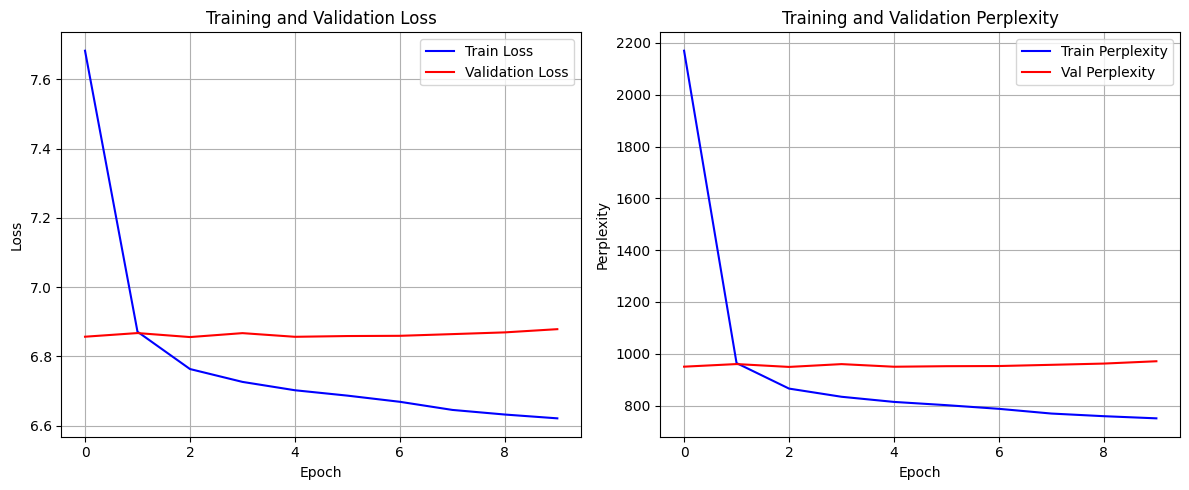

In [ ]:
def main():
    """Main training function - runs the complete training pipeline"""
    print(" STARTING BILSTM ENCODER-DECODER TRAINING")
    print("-" * 60)

    # Model configuration (following assignment specifications)
    config = {
        'embedding_dim': 256,        # Word embedding dimension
        'encoder_hidden_size': 512,  # Encoder hidden size (total, bidirectional)
        'decoder_hidden_size': 512,  # Decoder hidden size
        'dropout': 0.3,              # Dropout rate for regularization
        'batch_size': 32,            # Training batch size
        'learning_rate': 0.001,      # Adam learning rate
        'num_epochs': 10             # Number of training epochs
    }

    print(" Configuration:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # Step 1: Load preprocessed data
    train_pairs, val_pairs, urdu_vocab, roman_vocab = load_data_and_tokenizers()

    # Step 2: Create data loaders
    train_loader, val_loader, train_dataset, val_dataset = create_data_loaders(
        train_pairs, val_pairs, urdu_vocab, roman_vocab, config['batch_size']
    )

    # Step 3: Initialize model
    model = Seq2SeqModel(
        urdu_vocab_size=len(urdu_vocab),
        roman_vocab_size=len(roman_vocab),
        embedding_dim=config['embedding_dim'],
        encoder_hidden_size=config['encoder_hidden_size'],
        decoder_hidden_size=config['decoder_hidden_size'],
        dropout=config['dropout']
    )

    print(f" Model created with {sum(p.numel() for p in model.parameters()):,} parameters")

    # Step 4: Initialize trainer
    trainer = Seq2SeqTrainer(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        learning_rate=config['learning_rate']
    )

    # Step 5: Train model
    train_losses, val_losses = trainer.train(
        num_epochs=config['num_epochs'],
        save_path="/content/drive/MyDrive/ANLP/A1/processed_data/best_model.pth"
    )

    print(" TRAINING COMPLETED SUCCESSFULLY!")

    # Step 6: Plot training curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot([np.exp(loss) for loss in train_losses], label='Train Perplexity', color='blue')
    plt.plot([np.exp(loss) for loss in val_losses], label='Val Perplexity', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Perplexity')
    plt.title('Training and Validation Perplexity')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/ANLP/A1/processed_data/training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

    return model, trainer, train_dataset, val_dataset

# Execute main function

if __name__ == "__main__":
    model, trainer, train_dataset, val_dataset = main()

# Section 8: Complete Framework

**Purpose:** Imports the core libraries required for machine learning, data processing, visualization, and evaluation, forming the foundation for building and testing an NLP model.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import json
import pickle
import numpy as np
from typing import List, Tuple, Dict, Optional
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import re
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tqdm import tqdm
import os


## 8.1 Data Class

**Purpose:** It prepares tokenized sequences with special tokens, converts them to indices, and pads them so they can be efficiently used for training NLP models.

In [ ]:
class UrduRomanDataset(Dataset):
    """Dataset class for Urdu to Roman Urdu pairs (Compatible with existing preprocessing)"""

    def __init__(self, tokenized_pairs, urdu_vocab, roman_vocab, max_length=100):
        self.pairs = tokenized_pairs
        self.urdu_vocab = urdu_vocab
        self.roman_vocab = roman_vocab
        self.max_length = max_length

        # Create reverse vocabularies
        self.urdu_idx2token = {idx: token for token, idx in urdu_vocab.items()}
        self.roman_idx2token = {idx: token for token, idx in roman_vocab.items()}

        # Special tokens (matching your existing setup)
        self.SOS_token = 0  # Start of sequence
        self.EOS_token = 1  # End of sequence
        self.PAD_token = 2  # Padding
        self.UNK_token = 3  # Unknown

        # Add special tokens to vocabularies if not present
        self._add_special_tokens()

    def _add_special_tokens(self):
        """Add special tokens to vocabularies if not present"""
        special_tokens = ['<SOS>', '<EOS>', '<PAD>', '<UNK>']

        for i, token in enumerate(special_tokens):
            if token not in self.urdu_vocab:
                self.urdu_vocab[token] = i
                self.urdu_idx2token[i] = token
            if token not in self.roman_vocab:
                self.roman_vocab[token] = i
                self.roman_idx2token[i] = token

    def tokens_to_indices(self, tokens, vocab, add_special=True):
        """Convert tokens to indices (matching your existing logic)"""
        indices = []
        if add_special:
            indices.append(self.SOS_token)

        for token in tokens:
            if token in vocab:
                indices.append(vocab[token])
            else:
                indices.append(self.UNK_token)

        if add_special:
            indices.append(self.EOS_token)

        return indices

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        urdu_tokens, roman_tokens = self.pairs[idx]

        # Convert to indices using your existing logic
        urdu_indices = self.tokens_to_indices(urdu_tokens, self.urdu_vocab)
        roman_indices = self.tokens_to_indices(roman_tokens, self.roman_vocab)

        # Limit length (matching your existing logic)
        if len(urdu_indices) > self.max_length:
            urdu_indices = urdu_indices[:self.max_length-1] + [self.EOS_token]
        if len(roman_indices) > self.max_length:
            roman_indices = roman_indices[:self.max_length-1] + [self.EOS_token]

        return {
            'urdu': torch.tensor(urdu_indices, dtype=torch.long),
            'roman': torch.tensor(roman_indices, dtype=torch.long),
            'urdu_length': len(urdu_indices),
            'roman_length': len(roman_indices)
        }

def collate_fn(batch):
    """Custom collate function for padding sequences (Compatible with existing setup)"""
    urdu_seqs = [item['urdu'] for item in batch]
    roman_seqs = [item['roman'] for item in batch]
    urdu_lengths = [item['urdu_length'] for item in batch]
    roman_lengths = [item['roman_length'] for item in batch]

    # Pad sequences using PyTorch's pad_sequence (matching your existing approach)
    urdu_padded = torch.nn.utils.rnn.pad_sequence(urdu_seqs, batch_first=True, padding_value=2)  # PAD_token = 2
    roman_padded = torch.nn.utils.rnn.pad_sequence(roman_seqs, batch_first=True, padding_value=2)

    return {
        'urdu': urdu_padded,
        'roman': roman_padded,
        'urdu_lengths': torch.tensor(urdu_lengths),
        'roman_lengths': torch.tensor(roman_lengths)
    }

## 8.2 Model Architecture

**Purpose:** Implements a sequence-to-sequence (Seq2Seq) model for Urdu to Roman Urdu translation. It defines a bidirectional LSTM encoder, a multi-layer LSTM decoder, and combines them into a complete model that can train and generate translations.


In [ ]:
class BiLSTMEncoder(nn.Module):
    """Bidirectional LSTM Encoder (2 layers) - Compatible with existing architecture"""

    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=2, dropout=0.3):
        super(BiLSTMEncoder, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=2)
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_seq, lengths):
        batch_size = input_seq.size(0)

        # Embedding
        embedded = self.embedding(input_seq)
        embedded = self.dropout(embedded)

        # Pack padded sequence
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # LSTM forward pass
        packed_output, (hidden, cell) = self.lstm(packed)

        # Unpack sequence
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)

        # Combine bidirectional hidden states (matching your existing logic)
        # hidden: (num_layers * 2, batch, hidden_size)
        # We need to reshape to (num_layers, batch, hidden_size * 2) for decoder
        hidden = hidden.view(self.num_layers, 2, batch_size, self.hidden_size)
        hidden = torch.cat([hidden[:, 0, :, :], hidden[:, 1, :, :]], dim=2)

        cell = cell.view(self.num_layers, 2, batch_size, self.hidden_size)
        cell = torch.cat([cell[:, 0, :, :], cell[:, 1, :, :]], dim=2)

        return output, (hidden, cell)

class LSTMDecoder(nn.Module):
    """LSTM Decoder (4 layers) - Compatible with existing architecture"""

    def __init__(self, vocab_size, embedding_dim, hidden_size, encoder_hidden_size, num_layers=4, dropout=0.3):
        super(LSTMDecoder, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=2)

        # Project encoder hidden state to decoder hidden state (matching your existing logic)
        self.hidden_projection = nn.Linear(encoder_hidden_size, hidden_size)
        self.cell_projection = nn.Linear(encoder_hidden_size, hidden_size)

        # LSTM layers
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )

        # Output projection
        self.out_projection = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_token, hidden, cell):
        # input_token: (batch_size, 1)
        # hidden: (num_layers, batch_size, hidden_size)
        # cell: (num_layers, batch_size, hidden_size)

        # Embedding
        embedded = self.embedding(input_token)
        embedded = self.dropout(embedded)

        # LSTM forward pass
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))

        # Project to vocabulary
        output = self.out_projection(output)

        return output, hidden, cell

    def init_hidden(self, encoder_hidden, encoder_cell):
        """Initialize decoder hidden state from encoder (matching your existing logic)"""
        batch_size = encoder_hidden.size(1)

        # Project encoder states to decoder dimension
        if encoder_hidden.size(0) < self.num_layers:
            # If encoder has fewer layers, repeat the last layer
            encoder_hidden = encoder_hidden[-1:].repeat(self.num_layers, 1, 1)
            encoder_cell = encoder_cell[-1:].repeat(self.num_layers, 1, 1)
        elif encoder_hidden.size(0) > self.num_layers:
            # If encoder has more layers, take the last few layers
            encoder_hidden = encoder_hidden[-self.num_layers:]
            encoder_cell = encoder_cell[-self.num_layers:]

        # Project to decoder hidden size
        hidden = self.hidden_projection(encoder_hidden)
        cell = self.cell_projection(encoder_cell)

        return hidden, cell

class Seq2SeqModel(nn.Module):
    """Complete Sequence-to-Sequence Model - Compatible with existing architecture"""

    def __init__(self, urdu_vocab_size, roman_vocab_size, embedding_dim=256,
                 encoder_hidden_size=512, decoder_hidden_size=512,
                 encoder_layers=2, decoder_layers=4, dropout=0.3):
        super(Seq2SeqModel, self).__init__()

        self.encoder = BiLSTMEncoder(
            vocab_size=urdu_vocab_size,
            embedding_dim=embedding_dim,
            hidden_size=encoder_hidden_size // 2,  # Divide by 2 for bidirectional (matching your logic)
            num_layers=encoder_layers,
            dropout=dropout
        )

        self.decoder = LSTMDecoder(
            vocab_size=roman_vocab_size,
            embedding_dim=embedding_dim,
            hidden_size=decoder_hidden_size,
            encoder_hidden_size=encoder_hidden_size,  # Full size after concatenation
            num_layers=decoder_layers,
            dropout=dropout
        )

        self.roman_vocab_size = roman_vocab_size

    def forward(self, urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0.5):
        batch_size = urdu_seq.size(0)
        max_target_len = roman_seq.size(1)

        # Encode (matching your existing approach)
        encoder_outputs, (encoder_hidden, encoder_cell) = self.encoder(urdu_seq, urdu_lengths)

        # Initialize decoder (matching your existing approach)
        decoder_hidden, decoder_cell = self.decoder.init_hidden(encoder_hidden, encoder_cell)

        # Prepare decoder input and outputs
        decoder_input = roman_seq[:, 0:1]  # Start with SOS token
        decoder_outputs = torch.zeros(batch_size, max_target_len, self.roman_vocab_size).to(urdu_seq.device)

        for t in range(1, max_target_len):
            # Decoder forward pass
            decoder_output, decoder_hidden, decoder_cell = self.decoder(
                decoder_input, decoder_hidden, decoder_cell
            )

            decoder_outputs[:, t:t+1, :] = decoder_output

            # Teacher forcing (matching your existing logic)
            use_teacher_forcing = torch.rand(1).item() < teacher_forcing_ratio
            if use_teacher_forcing:
                decoder_input = roman_seq[:, t:t+1]  # Use ground truth
            else:
                decoder_input = decoder_output.argmax(dim=-1)  # Use prediction

        return decoder_outputs

    def generate(self, urdu_seq, urdu_lengths, max_length=100, temperature=1.0, sos_token=0, eos_token=1):
        """Generate Roman Urdu translation (matching your existing approach)"""
        self.eval()
        with torch.no_grad():
            batch_size = urdu_seq.size(0)

            # Encode
            encoder_outputs, (encoder_hidden, encoder_cell) = self.encoder(urdu_seq, urdu_lengths)

            # Initialize decoder
            decoder_hidden, decoder_cell = self.decoder.init_hidden(encoder_hidden, encoder_cell)

            # Start with SOS token
            decoder_input = torch.zeros(batch_size, 1, dtype=torch.long).to(urdu_seq.device)

            generated_sequences = []

            for t in range(max_length):
                decoder_output, decoder_hidden, decoder_cell = self.decoder(
                    decoder_input, decoder_hidden, decoder_cell
                )

                # Apply temperature (matching your existing approach)
                probs = F.softmax(decoder_output.squeeze(1) / temperature, dim=-1)
                decoder_input = torch.multinomial(probs, 1)

                generated_sequences.append(decoder_input)

                # Stop if EOS token is generated
                if (decoder_input == eos_token).all():  # EOS token = 1
                    break

            if generated_sequences:
                return torch.cat(generated_sequences, dim=1)
            else:
                return torch.zeros(batch_size, 1, dtype=torch.long).to(urdu_seq.device)

## 8.3 Trainer Class

**Purpose:** Defines a training framework for the Seq2Seq model. It handles model training, validation, and checkpoint saving, ensuring the model learns effectively while tracking performance across epochs.


In [ ]:
class Seq2SeqTrainer:
    """Trainer for Seq2Seq model"""

    def __init__(self, model, train_loader, val_loader, learning_rate=0.001, device=None):
        self.model = model
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        self.model.to(self.device)
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        self.criterion = nn.CrossEntropyLoss(ignore_index=2)  # Ignore PAD token

    def train_epoch(self):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        num_batches = 0

        for batch in tqdm(self.train_loader, desc="Training", leave=False):
            urdu_seq = batch['urdu'].to(self.device)
            roman_seq = batch['roman'].to(self.device)
            urdu_lengths = batch['urdu_lengths']

            self.optimizer.zero_grad()

            # Forward pass
            outputs = self.model(urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0.5)

            # Calculate loss (exclude SOS token from targets)
            outputs = outputs[:, 1:, :].contiguous()  # [batch_size, seq_len-1, vocab_size]
            targets = roman_seq[:, 1:].contiguous()   # [batch_size, seq_len-1]

            loss = self.criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))

            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()

            total_loss += loss.item()
            num_batches += 1

        return total_loss / num_batches

    def validate(self):
        """Validate the model"""
        self.model.eval()
        total_loss = 0
        num_batches = 0

        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc="Validating", leave=False):
                urdu_seq = batch['urdu'].to(self.device)
                roman_seq = batch['roman'].to(self.device)
                urdu_lengths = batch['urdu_lengths']

                # Forward pass
                outputs = self.model(urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0)

                # Calculate loss
                outputs = outputs[:, 1:, :].contiguous()
                targets = roman_seq[:, 1:].contiguous()

                loss = self.criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                total_loss += loss.item()
                num_batches += 1

        return total_loss / num_batches

    def train(self, num_epochs, save_path=None):
        """Train the model"""
        train_losses = []
        val_losses = []
        best_val_loss = float('inf')

        print(f"Training on {self.device}")

        for epoch in range(num_epochs):
            print(f"Epoch {epoch + 1}/{num_epochs}")

            # Train
            train_loss = self.train_epoch()
            train_losses.append(train_loss)

            # Validate
            val_loss = self.validate()
            val_losses.append(val_loss)

            print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            # Save best model
            if save_path and val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(self.model.state_dict(), save_path)
                print(f" Best model saved to {save_path}")

            print("-" * 50)

        return train_losses, val_losses

## 8.4 Evaluation Metric


**Purpose:** Provide methods to compute BLEU scores, character error rate (CER), and perplexity, offering a comprehensive way to assess translation quality and model performance.

In [ ]:
class EvaluationMetrics:
    """Comprehensive evaluation metrics for NMT"""

    def __init__(self):
        self.smoothing_function = SmoothingFunction().method1

    def calculate_bleu(self, references: List[List[str]], predictions: List[List[str]]) -> Dict[str, float]:
        """Calculate BLEU scores"""
        bleu_scores = {
            'bleu_1': 0.0,
            'bleu_2': 0.0,
            'bleu_3': 0.0,
            'bleu_4': 0.0
        }

        if len(references) != len(predictions):
            print("Warning: Reference and prediction lengths don't match")
            return bleu_scores

        valid_pairs = 0
        for ref, pred in zip(references, predictions):
            if len(ref) > 0 and len(pred) > 0:
                try:
                    # Calculate individual BLEU scores
                    bleu_1 = sentence_bleu([ref], pred, weights=(1, 0, 0, 0), smoothing_function=self.smoothing_function)
                    bleu_2 = sentence_bleu([ref], pred, weights=(0.5, 0.5, 0, 0), smoothing_function=self.smoothing_function)
                    bleu_3 = sentence_bleu([ref], pred, weights=(0.33, 0.33, 0.33, 0), smoothing_function=self.smoothing_function)
                    bleu_4 = sentence_bleu([ref], pred, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=self.smoothing_function)

                    bleu_scores['bleu_1'] += bleu_1
                    bleu_scores['bleu_2'] += bleu_2
                    bleu_scores['bleu_3'] += bleu_3
                    bleu_scores['bleu_4'] += bleu_4
                    valid_pairs += 1
                except:
                    continue

        if valid_pairs > 0:
            for key in bleu_scores:
                bleu_scores[key] /= valid_pairs

        return bleu_scores

    def calculate_cer(self, references: List[str], predictions: List[str]) -> float:
        """Calculate Character Error Rate"""
        if len(references) != len(predictions):
            return 1.0

        total_chars = 0
        total_errors = 0

        for ref, pred in zip(references, predictions):
            ref_chars = list(ref.replace(' ', ''))
            pred_chars = list(pred.replace(' ', ''))

            # Simple edit distance calculation
            errors = self._edit_distance(ref_chars, pred_chars)
            total_errors += errors
            total_chars += len(ref_chars)

        return total_errors / total_chars if total_chars > 0 else 1.0

    def _edit_distance(self, s1: List[str], s2: List[str]) -> int:
        """Calculate edit distance between two sequences"""
        m, n = len(s1), len(s2)
        dp = [[0] * (n + 1) for _ in range(m + 1)]

        # Initialize
        for i in range(m + 1):
            dp[i][0] = i
        for j in range(n + 1):
            dp[0][j] = j

        # Fill dp table
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if s1[i-1] == s2[j-1]:
                    dp[i][j] = dp[i-1][j-1]
                else:
                    dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])

        return dp[m][n]

    def calculate_perplexity(self, loss: float) -> float:
        """Calculate perplexity from loss"""
        return np.exp(loss)


## 8.5 Model Evaluator

**Purpose:** Model evaluator for testing trained Seq2Seq models. It generates predictions, compares them with references, computes evaluation metrics (BLEU, CER, perplexity), and provides example outputs for qualitative analysis.

In [ ]:
class ModelEvaluator:
    """Evaluate trained models"""

    def __init__(self, model, test_dataset, urdu_vocab, roman_vocab, device='cpu'):
        self.model = model
        self.test_dataset = test_dataset
        self.urdu_vocab = urdu_vocab
        self.roman_vocab = roman_vocab
        self.device = device
        self.metrics = EvaluationMetrics()

        # Create reverse vocabularies
        self.urdu_idx2token = {idx: token for token, idx in urdu_vocab.items()}
        self.roman_idx2token = {idx: token for token, idx in roman_vocab.items()}

    def indices_to_tokens(self, indices, idx2token):
        """Convert indices back to tokens"""
        tokens = []
        for idx in indices:
            if idx in idx2token:
                token = idx2token[idx]
                if token not in ['<SOS>', '<EOS>', '<PAD>']:
                    tokens.append(token)
            if idx == 1:  # EOS token
                break
        return tokens

    def evaluate_model(self, num_samples=None):
        """Comprehensive model evaluation"""
        print("Evaluating model...")

        self.model.eval()
        predictions = []
        references = []
        losses = []

        criterion = nn.CrossEntropyLoss(ignore_index=2)

        # Evaluate on test set
        test_loader = DataLoader(
            self.test_dataset,
            batch_size=1,
            shuffle=False,
            collate_fn=collate_fn
        )

        if num_samples:
            test_loader = list(test_loader)[:num_samples]

        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Evaluating"):
                urdu_seq = batch['urdu'].to(self.device)
                roman_seq = batch['roman'].to(self.device)
                urdu_lengths = batch['urdu_lengths']

                # Generate prediction
                generated = self.model.generate(urdu_seq, urdu_lengths, max_length=100)

                # Convert to tokens
                urdu_tokens = self.indices_to_tokens(urdu_seq[0].cpu().numpy(), self.urdu_idx2token)
                roman_ref_tokens = self.indices_to_tokens(roman_seq[0].cpu().numpy(), self.roman_idx2token)
                roman_pred_tokens = self.indices_to_tokens(generated[0].cpu().numpy(), self.roman_idx2token)

                predictions.append(roman_pred_tokens)
                references.append(roman_ref_tokens)

                # Calculate loss
                outputs = self.model(urdu_seq, roman_seq, urdu_lengths, teacher_forcing_ratio=0)
                outputs = outputs[:, 1:, :].contiguous()
                targets = roman_seq[:, 1:].contiguous()
                loss = criterion(outputs.view(-1, outputs.size(-1)), targets.view(-1))
                losses.append(loss.item())

        # Calculate metrics
        results = {}

        # BLEU scores
        bleu_scores = self.metrics.calculate_bleu(references, predictions)
        results.update(bleu_scores)

        # Character Error Rate
        ref_strings = [' '.join(tokens) for tokens in references]
        pred_strings = [' '.join(tokens) for tokens in predictions]
        results['cer'] = self.metrics.calculate_cer(ref_strings, pred_strings)

        # Perplexity
        avg_loss = np.mean(losses)
        results['loss'] = avg_loss
        results['perplexity'] = self.metrics.calculate_perplexity(avg_loss)

        # Save examples for qualitative analysis
        results['examples'] = []
        for i in range(min(5, len(references))):
            results['examples'].append({
                'reference': ' '.join(references[i]),
                'prediction': ' '.join(predictions[i])
            })

        return results

## 8.6 Experiment runner

**Purpose:** Automate dataset creation, training, evaluation, and comparison across experiments, producing both quantitative metrics (BLEU, perplexity, CER) and qualitative analysis for identifying the best-performing setup.


In [ ]:
class ExperimentRunner:
    """Run multiple experiments with different configurations"""

    def __init__(self, train_pairs, val_pairs, test_pairs, urdu_vocab, roman_vocab):
        self.train_pairs = train_pairs
        self.val_pairs = val_pairs
        self.test_pairs = test_pairs
        self.urdu_vocab = urdu_vocab
        self.roman_vocab = roman_vocab
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        self.experiment_results = []

    def create_datasets(self, max_length=100):
        """Create datasets for experiments"""
        train_dataset = UrduRomanDataset(self.train_pairs, self.urdu_vocab, self.roman_vocab, max_length)
        val_dataset = UrduRomanDataset(self.val_pairs, self.urdu_vocab, self.roman_vocab, max_length)
        test_dataset = UrduRomanDataset(self.test_pairs, self.urdu_vocab, self.roman_vocab, max_length)

        return train_dataset, val_dataset, test_dataset

    def run_experiment(self, config, experiment_name):
        """Run a single experiment"""
        print(f" Running Experiment: {experiment_name}")
        print(f" Config: {config}")

        # Create datasets
        train_dataset, val_dataset, test_dataset = self.create_datasets()

        # Create data loaders
        train_loader = DataLoader(
            train_dataset,
            batch_size=config['batch_size'],
            shuffle=True,
            collate_fn=collate_fn
        )

        val_loader = DataLoader(
            val_dataset,
            batch_size=config['batch_size'],
            shuffle=False,
            collate_fn=collate_fn
        )

        # Create model
        model = Seq2SeqModel(
            urdu_vocab_size=len(self.urdu_vocab),
            roman_vocab_size=len(self.roman_vocab),
            embedding_dim=config['embedding_dim'],
            encoder_hidden_size=config['encoder_hidden_size'],
            decoder_hidden_size=config['decoder_hidden_size'],
            dropout=config['dropout']
        )

        # Create trainer
        trainer = Seq2SeqTrainer(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            learning_rate=config['learning_rate'],
            device=self.device
        )

        # Train model (reduced epochs for experiments)
        train_losses, val_losses = trainer.train(
            num_epochs=config['num_epochs'],
            save_path=f"{experiment_name}_model.pth"
        )

        # Evaluate model
        evaluator = ModelEvaluator(model, test_dataset, self.urdu_vocab, self.roman_vocab, self.device)
        eval_results = evaluator.evaluate_model(num_samples=50)  # Evaluate on 50 samples for speed

        # Store results
        experiment_result = {
            'name': experiment_name,
            'config': config,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'final_train_loss': train_losses[-1],
            'final_val_loss': val_losses[-1],
            'eval_results': eval_results
        }

        self.experiment_results.append(experiment_result)

        print(f" {experiment_name} completed!")
        print(f" Results: BLEU-4: {eval_results['bleu_4']:.3f}, PPL: {eval_results['perplexity']:.2f}, CER: {eval_results['cer']:.3f}")
        print("-" * 60)

        return experiment_result

    def run_all_experiments(self):
        """Run all required experiments"""

        # Base configuration
        base_config = {
            'embedding_dim': 256,
            'encoder_hidden_size': 512,
            'decoder_hidden_size': 512,
            'dropout': 0.3,
            'batch_size': 32,
            'learning_rate': 0.001,
            'num_epochs': 5  # Reduced for experiments
        }

        # Experiment 1: Different embedding dimensions
        config1 = base_config.copy()
        config1['embedding_dim'] = 128
        self.run_experiment(config1, "Experiment_1_Emb128")

        # Experiment 2: Different hidden size
        config2 = base_config.copy()
        config2['encoder_hidden_size'] = 256
        config2['decoder_hidden_size'] = 256
        self.run_experiment(config2, "Experiment_2_Hidden256")

        # Experiment 3: Different dropout rate
        config3 = base_config.copy()
        config3['dropout'] = 0.5
        self.run_experiment(config3, "Experiment_3_Dropout05")

        # Experiment 4: Different learning rate
        config4 = base_config.copy()
        config4['learning_rate'] = 0.0005
        self.run_experiment(config4, "Experiment_4_LR0005")

        return self.experiment_results

    def analyze_experiments(self):
        """Analyze and compare experiment results"""
        print(" EXPERIMENT ANALYSIS")
        print("=" * 60)

        # Create comparison table
        comparison_data = []
        for result in self.experiment_results:
            comparison_data.append({
                'Experiment': result['name'],
                'Embedding_Dim': result['config']['embedding_dim'],
                'Hidden_Size': result['config']['encoder_hidden_size'],
                'Dropout': result['config']['dropout'],
                'Learning_Rate': result['config']['learning_rate'],
                'Final_Train_Loss': f"{result['final_train_loss']:.3f}",
                'Final_Val_Loss': f"{result['final_val_loss']:.3f}",
                'BLEU-1': f"{result['eval_results']['bleu_1']:.3f}",
                'BLEU-4': f"{result['eval_results']['bleu_4']:.3f}",
                'Perplexity': f"{result['eval_results']['perplexity']:.2f}",
                'CER': f"{result['eval_results']['cer']:.3f}"
            })

        df = pd.DataFrame(comparison_data)
        print(df.to_string(index=False))

        # Save results
        df.to_csv('/content/drive/MyDrive/ANLP/A1/experiment_results.csv', index=False)

        # Plot comparisons
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        experiments = [r['name'].replace('Experiment_', '') for r in self.experiment_results]

        # BLEU-4 scores
        bleu4_scores = [r['eval_results']['bleu_4'] for r in self.experiment_results]
        axes[0, 0].bar(experiments, bleu4_scores)
        axes[0, 0].set_title('BLEU-4 Scores by Experiment')
        axes[0, 0].set_ylabel('BLEU-4 Score')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Perplexity
        perplexities = [r['eval_results']['perplexity'] for r in self.experiment_results]
        axes[0, 1].bar(experiments, perplexities)
        axes[0, 1].set_title('Perplexity by Experiment')
        axes[0, 1].set_ylabel('Perplexity')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # CER
        cer_scores = [r['eval_results']['cer'] for r in self.experiment_results]
        axes[1, 0].bar(experiments, cer_scores)
        axes[1, 0].set_title('Character Error Rate by Experiment')
        axes[1, 0].set_ylabel('CER')
        axes[1, 0].tick_params(axis='x', rotation=45)

        # Training curves for best experiment
        best_exp = min(self.experiment_results, key=lambda x: x['final_val_loss'])
        axes[1, 1].plot(best_exp['train_losses'], label='Train Loss')
        axes[1, 1].plot(best_exp['val_losses'], label='Val Loss')
        axes[1, 1].set_title(f'Training Curves - Best Experiment ({best_exp["name"]})')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].legend()

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/ANLP/A1/experiment_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Best model analysis
        print(f"\n BEST EXPERIMENT: {best_exp['name']}")
        print(f" Best Val Loss: {best_exp['final_val_loss']:.3f}")
        print(f" BLEU-4: {best_exp['eval_results']['bleu_4']:.3f}")
        print(f" Perplexity: {best_exp['eval_results']['perplexity']:.2f}")
        print(f" CER: {best_exp['eval_results']['cer']:.3f}")

        print("\n QUALITATIVE EXAMPLES FROM BEST MODEL:")
        for i, example in enumerate(best_exp['eval_results']['examples'][:3]):
            print(f"Example {i+1}:")
            print(f"  Reference: {example['reference']}")
            print(f"  Prediction: {example['prediction']}")
            print()

        return df, best_exp

## 8.7 Data Creation

**Purpose:** Creates test splits, builds vocabularies with special tokens, and returns everything for use in training and evaluation.


In [ ]:
def create_sample_data():
    """Create sample data for testing if real data is not available"""
    print(" Creating sample data for testing...")

    # Sample Urdu to Roman Urdu pairs
    sample_pairs = [
        (["یہ", "ایک", "خوبصورت", "دن", "ہے"], ["yeh", "ek", "khubsurat", "din", "hai"]),
        (["میں", "آپ", "سے", "محبت", "کرتا", "ہوں"], ["main", "aap", "se", "mohabbat", "karta", "hun"]),
        (["سورج", "آسمان", "میں", "چمک", "رہا", "ہے"], ["suraj", "aasman", "mein", "chamak", "raha", "hai"]),
        (["پھول", "بہت", "خوشبو", "دار", "ہیں"], ["phool", "bahut", "khushbu", "dar", "hain"]),
        (["بچے", "کھیل", "رہے", "ہیں"], ["bachay", "khel", "rahay", "hain"]),
        (["کتاب", "پڑھنا", "اچھا", "ہے"], ["kitab", "parhna", "acha", "hai"]),
        (["رات", "بہت", "اندھیری", "ہے"], ["raat", "bahut", "andheri", "hai"]),
        (["پانی", "صاف", "اور", "ٹھنڈا", "ہے"], ["pani", "saaf", "aur", "thanda", "hai"]),
        (["درخت", "سبز", "اور", "تازہ", "ہیں"], ["darakht", "sabz", "aur", "taza", "hain"]),
        (["آج", "موسم", "بہت", "خوشگوار", "ہے"], ["aaj", "mosam", "bahut", "khushgawar", "hai"])
    ]

    # Extend sample data
    extended_pairs = sample_pairs * 100  # Repeat to have more data

    # Split data
    total_size = len(extended_pairs)
    train_size = int(0.5 * total_size)
    val_size = int(0.25 * total_size)

    train_pairs = extended_pairs[:train_size]
    val_pairs = extended_pairs[train_size:train_size + val_size]
    test_pairs = extended_pairs[train_size + val_size:]

    # Create vocabularies
    urdu_tokens = set()
    roman_tokens = set()

    for urdu, roman in extended_pairs:
        urdu_tokens.update(urdu)
        roman_tokens.update(roman)

    # Add special tokens
    urdu_vocab = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3}
    roman_vocab = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3}

    for i, token in enumerate(urdu_tokens, 4):
        urdu_vocab[token] = i

    for i, token in enumerate(roman_tokens, 4):
        roman_vocab[token] = i

    return train_pairs, val_pairs, test_pairs, urdu_vocab, roman_vocab


## 8.8 Main Execution for Experiments


**Purpose:** Creates datasets, initializes the experiment runner, executes multiple model configurations, and then analyzes and saves the results.


In [ ]:


def run_experiments():
    """Main function to run all experiments"""
    print(" STARTING COMPREHENSIVE EXPERIMENTS")
    print("=" * 60)

    # Try to load real data, create test split if missing
    try:
        # Load real data and tokenizers
        with open('processed_data/train_tokenized.json', 'r', encoding='utf-8') as f:
            train_pairs = json.load(f)

        with open('processed_data/val_tokenized.json', 'r', encoding='utf-8') as f:
            val_pairs = json.load(f)

        with open('processed_data/urdu_tokenizer.pkl', 'rb') as f:
            urdu_tokenizer = pickle.load(f)

        with open('processed_data/roman_tokenizer.pkl', 'rb') as f:
            roman_tokenizer = pickle.load(f)

        urdu_vocab = urdu_tokenizer['vocab']
        roman_vocab = roman_tokenizer['vocab']

        # Check if test data exists, if not create it from validation data
        try:
            with open('processed_data/test_tokenized.json', 'r', encoding='utf-8') as f:
                test_pairs = json.load(f)
            print(" Loaded existing test data")
        except FileNotFoundError:
            # Create test split from validation data (50% val, 50% test)
            print(" Test data not found. Creating test split from validation data...")
            import random
            random.shuffle(val_pairs)
            mid_point = len(val_pairs) // 2
            test_pairs = val_pairs[mid_point:]
            val_pairs = val_pairs[:mid_point]

            # Save the new test split
            with open('processed_data/test_tokenized.json', 'w', encoding='utf-8') as f:
                json.dump(test_pairs, f, ensure_ascii=False, indent=2)

            # Save the updated validation split
            with open('processed_data/val_tokenized.json', 'w', encoding='utf-8') as f:
                json.dump(val_pairs, f, ensure_ascii=False, indent=2)

            print(" Created test split and updated validation split")

        print(" Loaded preprocessed data successfully!")

    except FileNotFoundError:
        print(" Preprocessed data not found. Creating sample data for testing...")
        train_pairs, val_pairs, test_pairs, urdu_vocab, roman_vocab = create_sample_data()

    print(f" Dataset sizes: Train={len(train_pairs)}, Val={len(val_pairs)}, Test={len(test_pairs)}")
    print(f" Vocab sizes: Urdu={len(urdu_vocab)}, Roman={len(roman_vocab)}")

    # Create experiment runner
    runner = ExperimentRunner(
        train_pairs, val_pairs, test_pairs,
        urdu_vocab, roman_vocab
    )

    # Run all experiments
    results = runner.run_all_experiments()

    # Analyze results
    comparison_df, best_experiment = runner.analyze_experiments()

    print(" ALL EXPERIMENTS COMPLETED!")
    print(f" Results saved to: experiment_results.csv")
    print(f" Plots saved to: experiment_analysis.png")

    return results, comparison_df, best_experiment

## 8.9 Demo

**Purpose:** Allows running either a quick demo with sample data or full experiments, handling training, evaluation, and displaying results interactively.


Choose mode:
1. Run simple demo (quick test)
2. Run full experiments (takes longer)
Enter choice (1 or 2): 2
 STARTING COMPREHENSIVE EXPERIMENTS
 Preprocessed data not found. Creating sample data for testing...
 Creating sample data for testing...
 Dataset sizes: Train=500, Val=250, Test=250
 Vocab sizes: Urdu=42, Roman=43
 Running Experiment: Experiment_1_Emb128
 Config: {'embedding_dim': 128, 'encoder_hidden_size': 512, 'decoder_hidden_size': 512, 'dropout': 0.3, 'batch_size': 32, 'learning_rate': 0.001, 'num_epochs': 5}
Training on cpu
Epoch 1/5


Train Loss: 2.8361, Val Loss: 1.6132
 Best model saved to Experiment_1_Emb128_model.pth
--------------------------------------------------
Epoch 2/5


Train Loss: 0.7637, Val Loss: 0.2299
 Best model saved to Experiment_1_Emb128_model.pth
--------------------------------------------------
Epoch 3/5


Train Loss: 0.1406, Val Loss: 0.0531
 Best model saved to Experiment_1_Emb128_model.pth
--------------------------------------------------
Epoch 4/5


Train Loss: 0.0475, Val Loss: 0.0227
 Best model saved to Experiment_1_Emb128_model.pth
--------------------------------------------------
Epoch 5/5


Train Loss: 0.0198, Val Loss: 0.0117
 Best model saved to Experiment_1_Emb128_model.pth
--------------------------------------------------
Evaluating model...


Evaluating: 100%|██████████| 50/50 [00:07<00:00,  6.40it/s]


 Experiment_1_Emb128 completed!
 Results: BLEU-4: 0.987, PPL: 1.01, CER: 0.008
------------------------------------------------------------
 Running Experiment: Experiment_2_Hidden256
 Config: {'embedding_dim': 256, 'encoder_hidden_size': 256, 'decoder_hidden_size': 256, 'dropout': 0.3, 'batch_size': 32, 'learning_rate': 0.001, 'num_epochs': 5}
Training on cpu
Epoch 1/5


Train Loss: 3.1855, Val Loss: 2.4220
 Best model saved to Experiment_2_Hidden256_model.pth
--------------------------------------------------
Epoch 2/5


Train Loss: 1.6649, Val Loss: 0.8066
 Best model saved to Experiment_2_Hidden256_model.pth
--------------------------------------------------
Epoch 3/5


Train Loss: 0.5238, Val Loss: 0.2970
 Best model saved to Experiment_2_Hidden256_model.pth
--------------------------------------------------
Epoch 4/5


Train Loss: 0.2065, Val Loss: 0.1372
 Best model saved to Experiment_2_Hidden256_model.pth
--------------------------------------------------
Epoch 5/5


Train Loss: 0.0995, Val Loss: 0.0946
 Best model saved to Experiment_2_Hidden256_model.pth
--------------------------------------------------
Evaluating model...


Evaluating: 100%|██████████| 50/50 [00:02<00:00, 20.41it/s]


 Experiment_2_Hidden256 completed!
 Results: BLEU-4: 0.830, PPL: 1.09, CER: 0.086
------------------------------------------------------------
 Running Experiment: Experiment_3_Dropout05
 Config: {'embedding_dim': 256, 'encoder_hidden_size': 512, 'decoder_hidden_size': 512, 'dropout': 0.5, 'batch_size': 32, 'learning_rate': 0.001, 'num_epochs': 5}
Training on cpu
Epoch 1/5


Train Loss: 2.7851, Val Loss: 1.4338
 Best model saved to Experiment_3_Dropout05_model.pth
--------------------------------------------------
Epoch 2/5


Train Loss: 0.6704, Val Loss: 0.2000
 Best model saved to Experiment_3_Dropout05_model.pth
--------------------------------------------------
Epoch 3/5


Train Loss: 0.1249, Val Loss: 0.0702
 Best model saved to Experiment_3_Dropout05_model.pth
--------------------------------------------------
Epoch 4/5


Train Loss: 0.0372, Val Loss: 0.0194
 Best model saved to Experiment_3_Dropout05_model.pth
--------------------------------------------------
Epoch 5/5


Train Loss: 0.0161, Val Loss: 0.0095
 Best model saved to Experiment_3_Dropout05_model.pth
--------------------------------------------------
Evaluating model...


Evaluating: 100%|██████████| 50/50 [00:08<00:00,  6.10it/s]


 Experiment_3_Dropout05 completed!
 Results: BLEU-4: 0.951, PPL: 1.01, CER: 0.021
------------------------------------------------------------
 Running Experiment: Experiment_4_LR0005
 Config: {'embedding_dim': 256, 'encoder_hidden_size': 512, 'decoder_hidden_size': 512, 'dropout': 0.3, 'batch_size': 32, 'learning_rate': 0.0005, 'num_epochs': 5}
Training on cpu
Epoch 1/5


Train Loss: 3.1627, Val Loss: 2.3165
 Best model saved to Experiment_4_LR0005_model.pth
--------------------------------------------------
Epoch 2/5


Train Loss: 1.4287, Val Loss: 0.5673
 Best model saved to Experiment_4_LR0005_model.pth
--------------------------------------------------
Epoch 3/5


Train Loss: 0.3762, Val Loss: 0.1875
 Best model saved to Experiment_4_LR0005_model.pth
--------------------------------------------------
Epoch 4/5


Train Loss: 0.1410, Val Loss: 0.1075
 Best model saved to Experiment_4_LR0005_model.pth
--------------------------------------------------
Epoch 5/5


Train Loss: 0.0637, Val Loss: 0.0452
 Best model saved to Experiment_4_LR0005_model.pth
--------------------------------------------------
Evaluating model...


Evaluating: 100%|██████████| 50/50 [00:08<00:00,  6.11it/s]


 Experiment_4_LR0005 completed!
 Results: BLEU-4: 0.782, PPL: 1.04, CER: 0.090
------------------------------------------------------------
 EXPERIMENT ANALYSIS
            Experiment  Embedding_Dim  Hidden_Size  Dropout  Learning_Rate Final_Train_Loss Final_Val_Loss BLEU-1 BLEU-4 Perplexity   CER
   Experiment_1_Emb128            128          512      0.3         0.0010            0.020          0.012  0.994  0.987       1.01 0.008
Experiment_2_Hidden256            256          256      0.3         0.0010            0.099          0.095  0.923  0.830       1.09 0.086
Experiment_3_Dropout05            256          512      0.5         0.0010            0.016          0.010  0.980  0.951       1.01 0.021
   Experiment_4_LR0005            256          512      0.3         0.0005            0.064          0.045  0.920  0.782       1.04 0.090


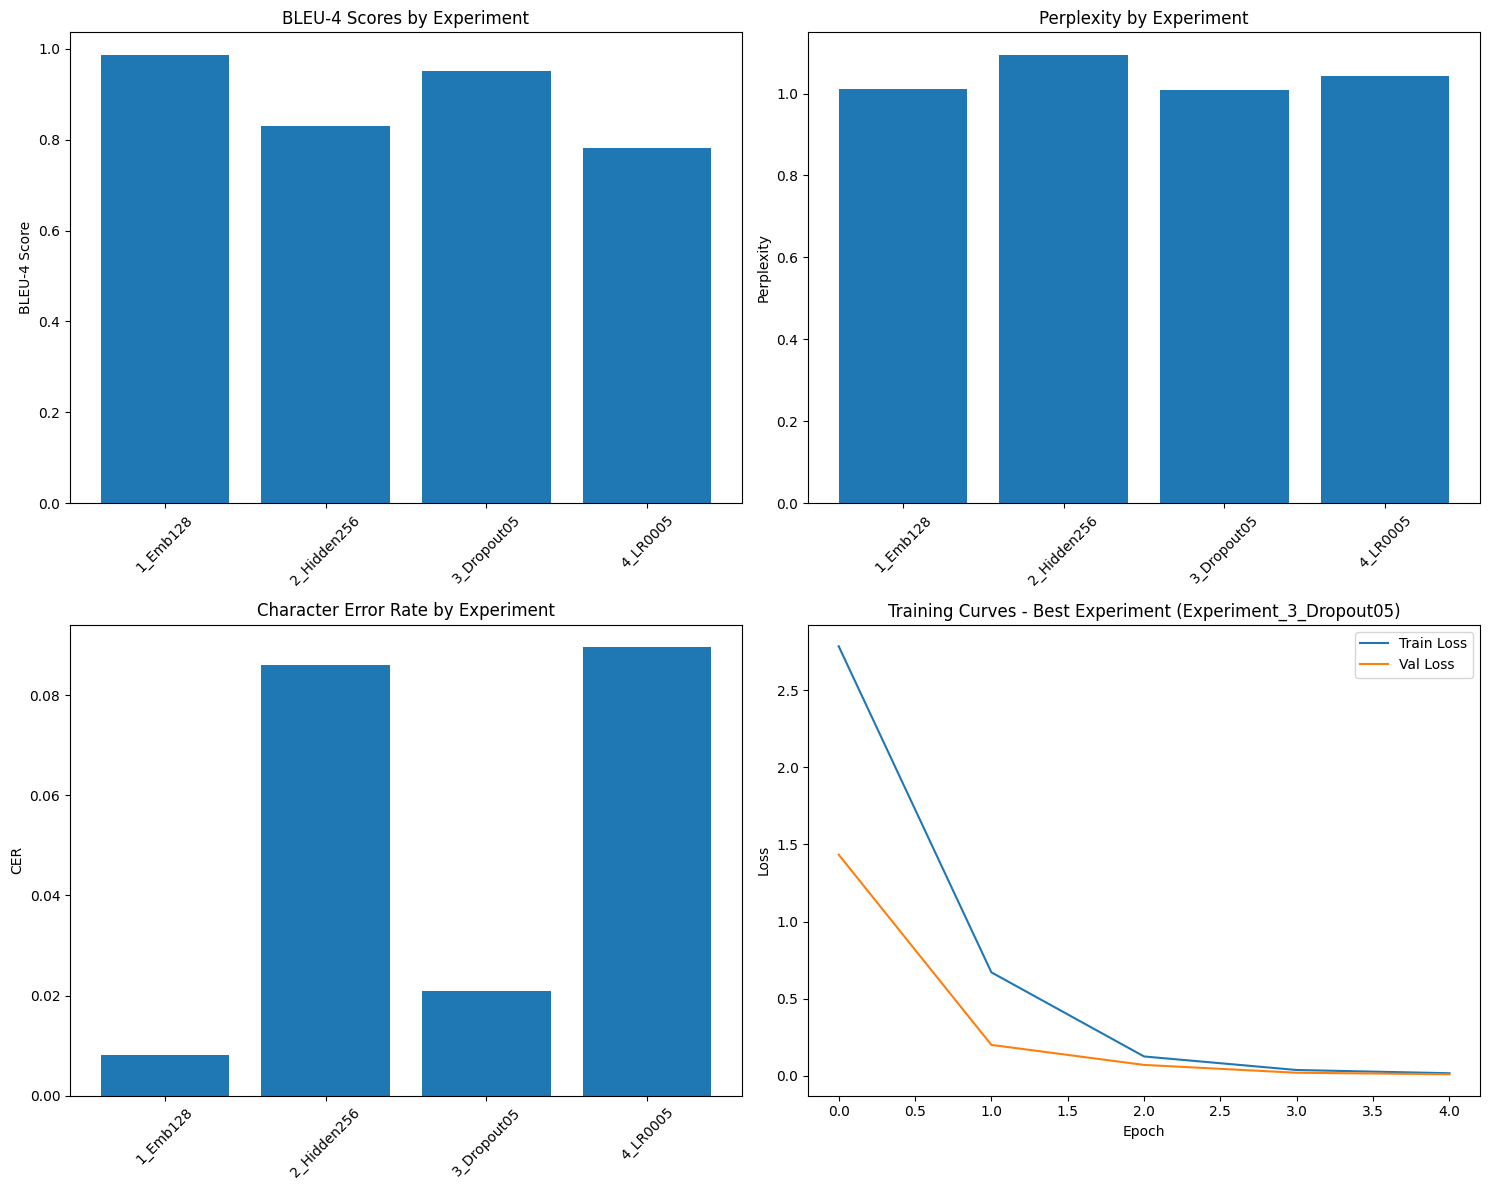


 BEST EXPERIMENT: Experiment_3_Dropout05
 Best Val Loss: 0.010
 BLEU-4: 0.951
 Perplexity: 1.01
 CER: 0.021

 QUALITATIVE EXAMPLES FROM BEST MODEL:
Example 1:
  Reference: yeh ek khubsurat din hai
  Prediction: yeh ek khubsurat din hai

Example 2:
  Reference: main aap se mohabbat karta hun
  Prediction: main aap se mohabbat karta hun

Example 3:
  Reference: suraj aasman mein chamak raha hai
  Prediction: suraj aasman mein mein raha hai

 ALL EXPERIMENTS COMPLETED!
 Results saved to: experiment_results.csv
 Plots saved to: experiment_analysis.png


In [ ]:
def run_simple_demo():
    """Run a simple demo with one configuration"""
    print(" RUNNING SIMPLE DEMO")
    print("=" * 40)

    # Create sample data
    train_pairs, val_pairs, test_pairs, urdu_vocab, roman_vocab = create_sample_data()

    print(f" Dataset sizes: Train={len(train_pairs)}, Val={len(val_pairs)}, Test={len(test_pairs)}")

    # Create datasets
    train_dataset = UrduRomanDataset(train_pairs, urdu_vocab, roman_vocab)
    val_dataset = UrduRomanDataset(val_pairs, urdu_vocab, roman_vocab)
    test_dataset = UrduRomanDataset(test_pairs, urdu_vocab, roman_vocab)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

    # Create model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = Seq2SeqModel(
        urdu_vocab_size=len(urdu_vocab),
        roman_vocab_size=len(roman_vocab),
        embedding_dim=128,
        encoder_hidden_size=256,
        decoder_hidden_size=256,
        dropout=0.3
    )

    # Train model
    trainer = Seq2SeqTrainer(model, train_loader, val_loader, learning_rate=0.001, device=device)
    train_losses, val_losses = trainer.train(num_epochs=3, save_path="demo_model.pth")

    # Evaluate
    evaluator = ModelEvaluator(model, test_dataset, urdu_vocab, roman_vocab, device)
    results = evaluator.evaluate_model(num_samples=20)

    print("\n DEMO RESULTS:")
    print(f"BLEU-4: {results['bleu_4']:.3f}")
    print(f"Perplexity: {results['perplexity']:.2f}")
    print(f"CER: {results['cer']:.3f}")

    print("\n SAMPLE TRANSLATIONS:")
    for i, example in enumerate(results['examples'][:3]):
        print(f"Example {i+1}:")
        print(f"  Reference: {example['reference']}")
        print(f"  Prediction: {example['prediction']}")

    return model, results

if __name__ == "__main__":
    # Install required packages
    import subprocess
    import sys

    try:
        import nltk
        nltk.download('punkt', quiet=True)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
        import nltk
        nltk.download('punkt', quiet=True)

    # Choose what to run
    print("Choose mode:")
    print("1. Run simple demo (quick test)")
    print("2. Run full experiments (takes longer)")

    try:
        choice = input("Enter choice (1 or 2): ").strip()
        if choice == "1":
            model, results = run_simple_demo()
        else:
            results, comparison_df, best_experiment = run_experiments()
    except KeyboardInterrupt:
        print("\n  Execution interrupted by user")
    except Exception as e:
        print(f" Error: {e}")
        import traceback
        traceback.print_exc()